# Create Figures for Supplement

In [2]:
import networkx as nx
import random
import collections
import numpy as np
import pandas as pd
import itertools
import sys
import pickle
import os
import zipfile
import scipy.stats as sp
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as patches
%matplotlib inline
import seaborn as sns

import mpox_utils_supplement 

from mpox_utils_supplement import *

In [3]:
# Set all font sizes
SMALL_SIZE = 20
MEDIUM_SIZE = 22
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [4]:

# Get other arguments
N = [5000, 10000, 20000, 40000, 80000]

p_infect = 0.9
steps = 250
intervention_start = 70
behavior_change_perc = 0.5
vax_delay = 30

reps = 50

date1 = '2025-02-05'
date2 = '2025-06-24'
date3 = '2025-06-25'
date4 = '2025-06-26'
date = '2025-06-27'

behavior_change = [0,2]
isolation = 1

res = []

for d in range(len(behavior_change)):
    for num in range(len(N)):
        vax_scenario = behavior_change[d]
        n_initial= int(N[num]/1000)
        
       # if behavior_change[d] == 0 and n_initial < 40:
       #     date = date2
       # elif behavior_change[d] == 0 and n_initial == 80:
       #     date = date3
       # elif behavior_change[d] == 0 and n_initial == 40:
       #     date = date4
       # else:
       #     date = date2
        
        sim_string = ('N' + str(n_initial) + 'k-' + str(intervention_start) + '-' + str(behavior_change[d]) + '-' + str(behavior_change_perc) 
                    +  '-' + str(isolation) + '-' + str(vax_delay) + '-' + str(vax_scenario) + 'SUPPLEMENT')
        
       
        with open(str('/n/home04/ecrenshaw/mpox/output/' + str(sim_string) + '/mpox_' + str(sim_string) + '_analyze_' + str(date) + '.pkl'), 'rb') as file: 
            # A new file will be created 
            print("Current step: ", file)
            res.append(pickle.load(file) )


res_5_010 = res[0]
res10_010 = res[1]
res20_010 = res[2]
res40_010 = res[3]
res80_010 = res[4]

'''
res_5_111 = res[5]
res10_111 = res[6]
res20_111 = res[7]
res40_111 = res[8]
res80_111 = res[9]
'''

res_5_212 = res[5]
res10_212 = res[6]
res20_212 = res[7]
res40_212 = res[8]
res80_212 = res[9]    


Current step:  <_io.BufferedReader name='/n/home04/ecrenshaw/mpox/output/N5k-70-0-0.5-1-30-0SUPPLEMENT/mpox_N5k-70-0-0.5-1-30-0SUPPLEMENT_analyze_2025-06-27.pkl'>
Current step:  <_io.BufferedReader name='/n/home04/ecrenshaw/mpox/output/N10k-70-0-0.5-1-30-0SUPPLEMENT/mpox_N10k-70-0-0.5-1-30-0SUPPLEMENT_analyze_2025-06-27.pkl'>
Current step:  <_io.BufferedReader name='/n/home04/ecrenshaw/mpox/output/N20k-70-0-0.5-1-30-0SUPPLEMENT/mpox_N20k-70-0-0.5-1-30-0SUPPLEMENT_analyze_2025-06-27.pkl'>
Current step:  <_io.BufferedReader name='/n/home04/ecrenshaw/mpox/output/N40k-70-0-0.5-1-30-0SUPPLEMENT/mpox_N40k-70-0-0.5-1-30-0SUPPLEMENT_analyze_2025-06-27.pkl'>
Current step:  <_io.BufferedReader name='/n/home04/ecrenshaw/mpox/output/N80k-70-0-0.5-1-30-0SUPPLEMENT/mpox_N80k-70-0-0.5-1-30-0SUPPLEMENT_analyze_2025-06-27.pkl'>
Current step:  <_io.BufferedReader name='/n/home04/ecrenshaw/mpox/output/N5k-70-2-0.5-1-30-2SUPPLEMENT/mpox_N5k-70-2-0.5-1-30-2SUPPLEMENT_analyze_2025-06-27.pkl'>
Current step: 

In [ ]:
#  wait_time_main_avg, wait_time_casual_avg, wait_time_main_perc, wait_time_casual_perc, 
#  rel_activity_avg, activity_strat_avg, rel_act_avg, runtime, total_infection

## Runtime

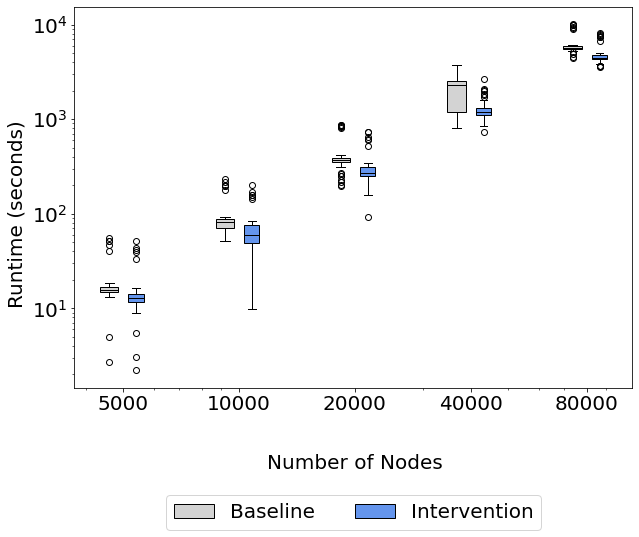

In [6]:
runtime010 = [res_5_010[7], res10_010[7], res20_010[7], res40_010[7], res80_010[7]]
runtime212 = [res_5_212[7], res10_212[7], res20_212[7], res40_212[7], res80_212[7]]

# X-axis positions
x_positions = [5000, 10000, 20000, 40000, 80000]
x_offset = [400, 800, 1600, 3200, 6400]

# Create the plot
plt.figure(figsize=(10, 7))
base = plt.boxplot(runtime010, positions=[x-y for x,y in zip(x_positions, x_offset)], widths=0.1 * np.array(x_positions), patch_artist=True)
intervention = plt.boxplot(runtime212, positions=[x+y for x,y in zip(x_positions, x_offset)], widths=0.1 * np.array(x_positions), patch_artist = True)

for patch in base['boxes']:
    patch.set_facecolor('lightgray')
    
for median in base['medians']:
    median.set_color('black')
    
for patch in intervention['boxes']:
    patch.set_facecolor('cornflowerblue')
    
for median in intervention['medians']:
    median.set_color('black')

# Set log scale for both axes
plt.xscale('log')
plt.yscale('log')

# Add labels and title
plt.text(20000, 0.2, 'Number of Nodes', ha='center')
plt.text(2500, 100, 'Runtime (seconds)', va='center', rotation='vertical')

# Customize x-ticks
plt.xticks(x_positions, labels=[str(x) for x in x_positions])

plt.legend([base["boxes"][0], intervention["boxes"][0]], 
          ['Baseline', 'Intervention'], loc='lower center', bbox_to_anchor=(0.5, -0.4), ncol = 4) 

plt.savefig('runtime.pdf', dpi=300, bbox_inches = "tight")

In [10]:
means = [np.mean(x) for x in runtime010]

logx = np.log10(x_positions)
logy = np.log10(means)

sp.linregress(logx, logy)

LinregressResult(slope=2.1805685946384843, intercept=-6.919456558094844, rvalue=0.9994948719861165, pvalue=1.3627090199959477e-05, stderr=0.040030353932347454, intercept_stderr=0.17301310293672031)

In [40]:
yval = [item for sublist in runtime010 for item in sublist]
x = [item for item in x_positions for _ in range(50)]

sp.linregress(np.log10(x), np.log10(yval))

LinregressResult(slope=2.11942331470326, intercept=-6.47733773202902, rvalue=0.9866032603829539, pvalue=2.6531308428893e-197, stderr=0.022253813848219024, intercept_stderr=0.09618204706766996)

In [7]:
runtime212 = [res_5_212[7], res10_212[7], res20_212[7], res40_212[7], res80_212[7]]
yval = [item for sublist in runtime212 for item in sublist]
x = [item for item in x_positions for _ in range(50)]

sp.linregress(np.log10(x), np.log10(yval))

LinregressResult(slope=2.133882721088903, intercept=-6.753507388688055, rvalue=0.9823150829455168, pvalue=1.8371765441284383e-182, stderr=0.02582746312884719, intercept_stderr=0.11162753006025063)

## Rewiring time

In [9]:
wt_casual_perc010 = [res_5_010[3], res10_010[3], res20_010[3], res40_010[3], res80_010[3]]
print([np.mean(x) for x in wt_casual_perc010])

#wt_casual_perc111 = [res_5_111[3], res10_111[3], res20_111[3], res40_111[3], res80_111[3]]
#print([np.mean(x) for x in wt_casual_perc111])

wt_casual_perc212 = [res_5_010[3], res10_212[3], res20_212[3], res40_212[3], res80_212[3]]
print([np.mean(x) for x in wt_casual_perc212])

[2.540911939810357e-05, 3.2123353678123997e-06, 3.3974165033820514e-06, 0.0, 0.0]
[2.540911939810357e-05, 1.416206642739486e-05, 1.92789666473877e-06, 0.0, 1.284807256249766e-06]


In [10]:
# multiply by 100 to get percentage
wt_main_perc010 = [res_5_010[2], res10_010[2], res20_010[2], res40_010[2], res80_010[2]]
print([np.mean(x) for x in wt_main_perc010])

#wt_main_perc111 = [res_5_111[2], res10_111[2], res20_111[2], res40_111[2], res80_111[2]]
#print([np.mean(x) for x in wt_main_perc111])

wt_main_perc212 = [res_5_010[2], res10_212[2], res20_212[2], res40_212[2], res80_212[2]]
print([np.mean(x) for x in wt_main_perc212])

[0.028675697601840237, 0.0017977434764262314, 1.2961762799740765e-05, 0.0, 0.0]
[0.028675697601840237, 0.002149547935617989, 1.1534025374855825e-05, 0.0, 0.0]


In [11]:
avg_casual_perc212 = [np.mean(x) for x in wt_casual_perc212]
avg_main_perc212 = [np.mean(x) for x in wt_main_perc212]

sd_casual_perc212 = [np.std(x) for x in wt_casual_perc212]
sd_main_perc212 = [np.std(x) for x in wt_main_perc212]

print("Casual")
print(avg_casual_perc212)
print(sd_casual_perc212)
print("Main")
print(avg_main_perc212)
print(sd_main_perc212)

Casual
[2.540911939810357e-05, 1.416206642739486e-05, 1.92789666473877e-06, 0.0, 1.284807256249766e-06]
[0.00013640097668533738, 4.8180243937095285e-05, 1.349527665317139e-05, 0.0, 6.6879086032985655e-06]
Main
[0.028675697601840237, 0.002149547935617989, 1.1534025374855825e-05, 0.0, 0.0]
[0.008314026088890347, 0.002016293386070233, 8.073817762399078e-05, 0.0, 0.0]


## Sensitivity of results to population size

In [5]:
infect010 = [res_5_010[8], res10_010[8], res20_010[8], res40_010[8]]#, res80_010[8]]
#infect111 = [res_5_111[8], res10_111[8], res20_111[8], res40_111[8], res80_111[8]]
infect212 = [res_5_212[8], res10_212[8], res20_212[8], res40_212[8], res80_212[8]]

In [6]:
# Average over the simulations and drop columns that indicate simulation number and isolation scenario
ti5_mean = np.mean(res_5_212[8], axis = 0)
ti10_mean = np.mean(res10_212[8], axis = 0)
ti20_mean = np.mean(res20_212[8], axis = 0)
ti40_mean = np.mean(res40_212[8], axis = 0)
ti80_mean = np.mean(res80_212[8], axis = 0)

Left, mean (IQR):  10.233600000000001 [ 1.9   8.54 11.48]
Middle , mean (IQR):  11.2378 [ 4.    9.54 12.4 ]
Middle, mean (IQR):  11.775 [ 5.35    10.385   12.26625]
Middle, mean (IQR):  12.5995 [ 6.505   11.35625 12.9825 ]
Right, mean (IQR):  12.8414 [ 6.725625 11.925    12.915   ]


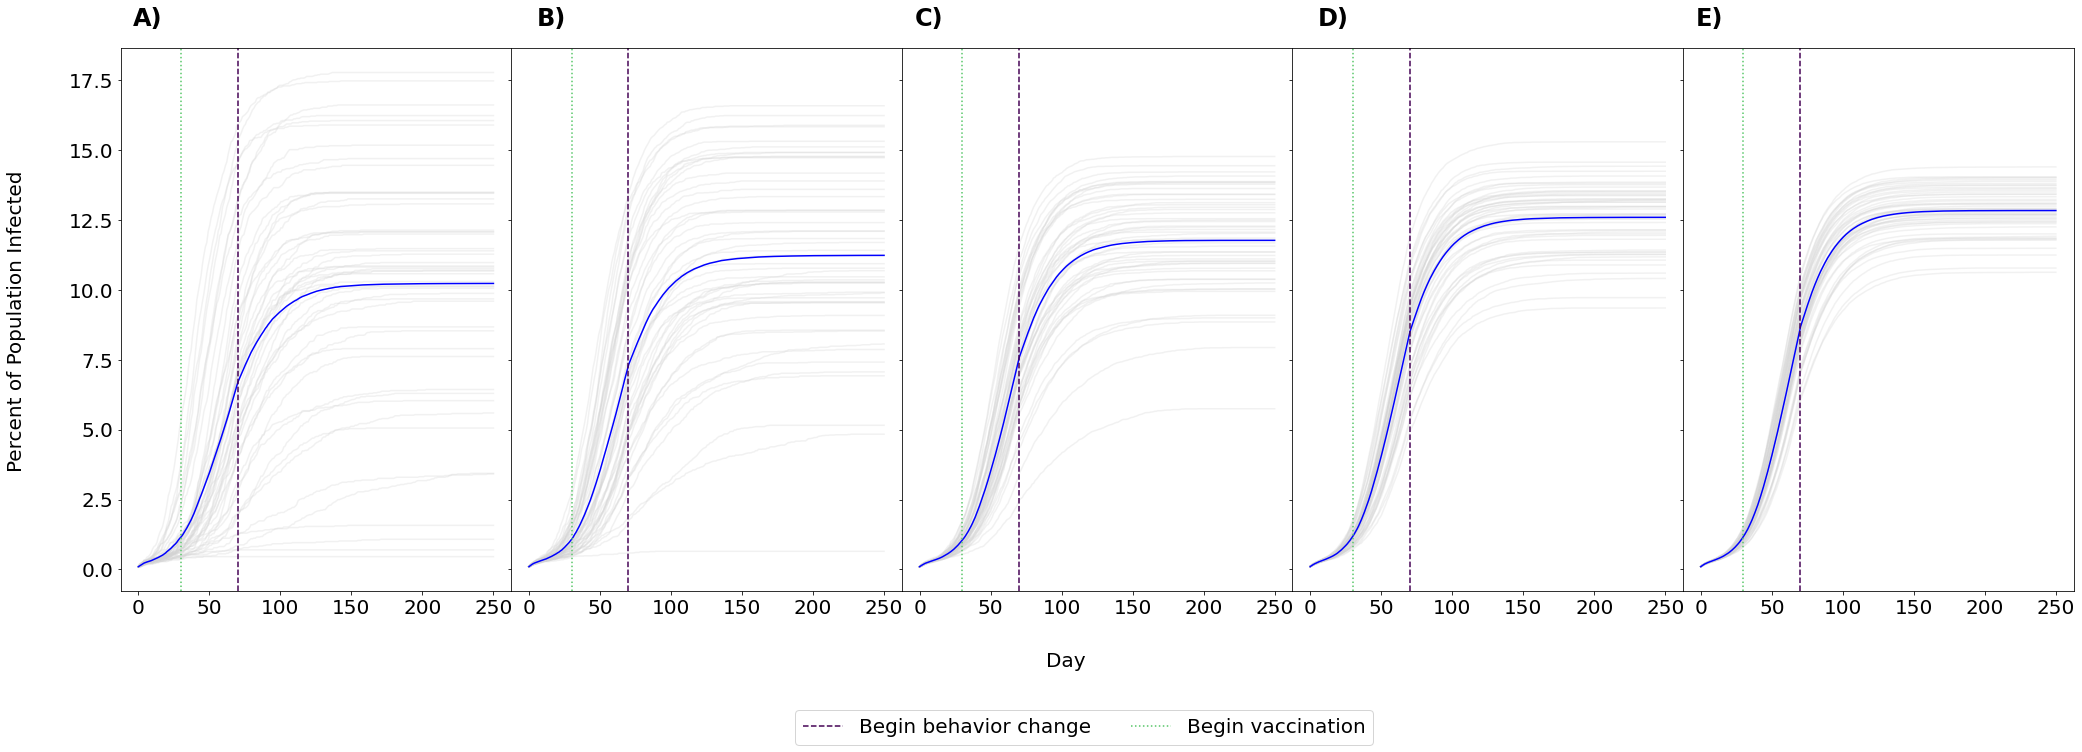

In [9]:
## Figure for less-optimistic isolation scenario (partial compliance)
div_by = [5000/100, 10000/100, 20000/100, 40000/100, 80000/100]

# Just show baseline, behavior 1/vax 0, and behavior 1/vax 1, isolation = 2
x = np.linspace(0,250,250)

fig = plt.figure(figsize = (35,10))
gs = fig.add_gridspec(1, 5, hspace=0.0, wspace=0.0)
(ax1, ax2, ax3, ax4, ax5) = gs.subplots(sharex='col', sharey=True)
fig.text(0.5, 0.02, 'Day', ha='center')
fig.text(0.08, 0.5, 'Percent of Population Infected', va='center', rotation='vertical')

ax_list = [ax1, ax2, ax3, ax4, ax5]
df_list = [ti5_mean, ti10_mean, ti20_mean, ti40_mean, ti80_mean]

for i in range(50):
    ax1.plot(x, res_5_212[8][i,:]/div_by[0], color = 'lightgray', alpha = 0.3)
    ax2.plot(x, res10_212[8][i,:]/div_by[1], color = 'lightgray', alpha = 0.3)
    ax3.plot(x, res20_212[8][i,:]/div_by[2], color = 'lightgray', alpha = 0.3)
    ax4.plot(x, res40_212[8][i,:]/div_by[3], color = 'lightgray', alpha = 0.3)
    ax5.plot(x, res80_212[8][i,:]/div_by[4], color = 'lightgray', alpha = 0.3)
    
    
ax1.plot(x, ti5_mean/div_by[0], color = 'blue')
ax2.plot(x, ti10_mean/div_by[1], color = 'blue')
ax3.plot(x, ti20_mean/div_by[2], color = 'blue')
ax4.plot(x, ti40_mean/div_by[3], color = 'blue')
ax5.plot(x, ti80_mean/div_by[4], color = 'blue', label = "Point-wise average")
    
for ax in [ax1, ax2, ax3, ax4, ax5]:
    ax.axvline(x = 70, color = "#440154FF", alpha = 1, linestyle = "dashed", label = "Begin behavior change")
    
for ax in [ax1, ax2, ax3, ax4, ax5]:
    ax.axvline(x = 30, color = '#55C667FF', alpha = 1, linestyle = "dotted", label = "Begin vaccination")


    
# Shrink current axis by 20%
box = ax5.get_position()

# Put a legend below the current axis
ax3.legend(loc='center left', bbox_to_anchor=(-0.3, -0.25), ncol = 3)

fig.text(0.13, 0.92, 'A)', va='center', fontweight = 'bold', fontsize = 24)
fig.text(0.29, 0.92, 'B)', va='center', fontweight = 'bold', fontsize = 24)
fig.text(0.44, 0.92, 'C)', va='center', fontweight = 'bold', fontsize = 24)
fig.text(0.60, 0.92, 'D)', va='center', fontweight = 'bold', fontsize = 24)
fig.text(0.75, 0.92, 'E)', va='center', fontweight = 'bold', fontsize = 24)

# Put a legend to the right of the current axis
plt.savefig('results_populationsize_all.pdf', dpi=600, bbox_inches = "tight")

# Print out results to put in text
print("Left, mean (IQR): ", ti5_mean[-1]/div_by[0], np.percentile(res_5_212[8]/div_by[0], [25, 50, 75]))
print("Middle , mean (IQR): ", ti10_mean[-1]/div_by[1], np.percentile(res10_212[8]/div_by[1], [25, 50, 75]))
print("Middle, mean (IQR): ", ti20_mean[-1]/div_by[2], np.percentile(res20_212[8]/div_by[2], [25, 50, 75]))
print("Middle, mean (IQR): ", ti40_mean[-1]/div_by[3], np.percentile(res40_212[8]/div_by[3], [25, 50, 75]))
print("Right, mean (IQR): ", ti80_mean[-1]/div_by[4], np.percentile(res80_212[8]/div_by[4], [25, 50, 75]))

## Node degree and number of contacts

In [ ]:
#  wait_time_main_avg, wait_time_casual_avg, wait_time_main_perc, wait_time_casual_perc, 
#  rel_activity_avg, activity_strat_avg, rel_act_avg, runtime, total_infection

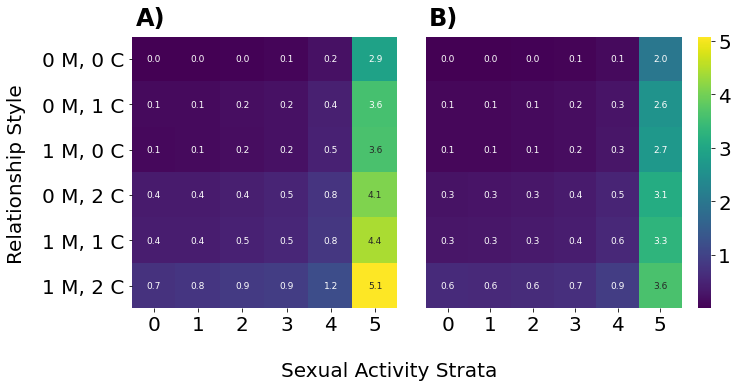

In [11]:
# Baseline, no-intervention model

relact10_mean = np.mean(res10_010[6], axis = 0)
relact10_mean2 = np.mean(res10_212[6], axis = 0)

relact10_mean[[2, 3]] = relact10_mean[[3, 2]]
relact10_mean2[[2, 3]] = relact10_mean2[[3, 2]]

# Calibrate the values over both heatmaps
values = np.hstack([relact10_mean, relact10_mean2]).ravel().tolist()
values2 = [x for x in values if x == x]
norm = mcolors.Normalize(np.min(values2), np.max(values2)) 

# plot
fig, ax = plt.subplots(1, 2, figsize = (11,5), gridspec_kw={'width_ratios': [1, 1.2]})
plt.subplots_adjust(wspace=0.1)

sns.heatmap(relact10_mean, ax = ax[0], norm = norm, cbar = False, cmap='viridis', annot=True, fmt=".1f", annot_kws={"fontsize":9}, 
           yticklabels = ['0 M, 0 C', '0 M, 1 C', '1 M, 0 C', '0 M, 2 C', '1 M, 1 C', '1 M, 2 C'])

sns.heatmap(relact10_mean2, ax = ax[1], norm = norm, cbar = True, cmap='viridis', annot=True, fmt=".1f", annot_kws={"fontsize":9}, 
           yticklabels = False)

fig.text(0.13, 0.93, 'A)', va='center', fontweight = 'bold', fontsize = 24)
fig.text(0.5, 0.93, 'B)', va='center', fontweight = 'bold', fontsize = 24)

fig.text(0.45, -0.05, 'Sexual Activity Strata', ha='center', va='center')
fig.text(-0.02, 0.5, 'Relationship Style', ha='center', va='center', rotation='vertical')

plt.savefig('contacts_10k.pdf', dpi=600, bbox_inches = "tight")

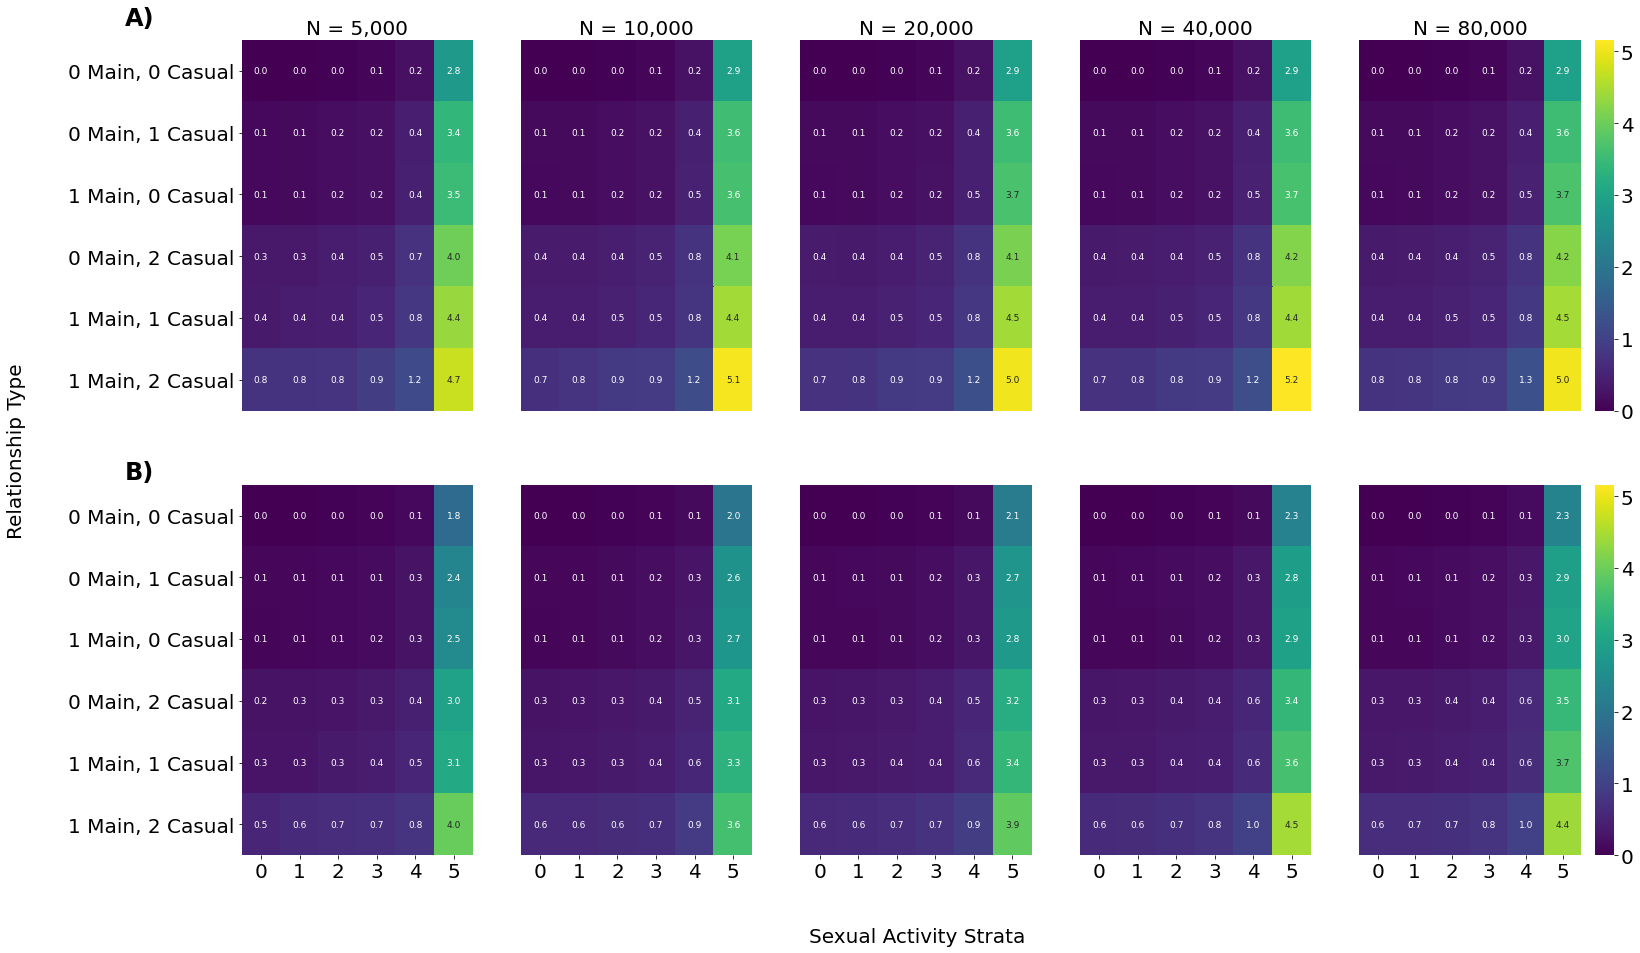

In [12]:
# Baseline and intervention models

relact5_mean010 = np.mean(res_5_010[6], axis = 0)
relact10_mean010 = np.mean(res10_010[6], axis = 0)
relact20_mean010 = np.mean(res20_010[6], axis = 0)
relact40_mean010 = np.mean(res40_010[6], axis = 0)
relact80_mean010 = np.mean(res80_010[6], axis = 0)

relact5_mean010[[2, 3]] = relact5_mean010[[3, 2]]
relact10_mean010[[2, 3]] = relact10_mean010[[3, 2]]
relact20_mean010[[2, 3]] = relact20_mean010[[3, 2]]
relact40_mean010[[2, 3]] = relact40_mean010[[3, 2]]
relact80_mean010[[2, 3]] = relact80_mean010[[3, 2]]

relact5_mean212 = np.mean(res_5_212[6], axis = 0)
relact10_mean212 = np.mean(res10_212[6], axis = 0)
relact20_mean212 = np.mean(res20_212[6], axis = 0)
relact40_mean212 = np.mean(res40_212[6], axis = 0)
relact80_mean212 = np.mean(res80_212[6], axis = 0)

relact5_mean212[[2, 3]] = relact5_mean212[[3, 2]]
relact10_mean212[[2, 3]] = relact10_mean212[[3, 2]]
relact20_mean212[[2, 3]] = relact20_mean212[[3, 2]]
relact40_mean212[[2, 3]] = relact40_mean212[[3, 2]]
relact80_mean212[[2, 3]] = relact80_mean212[[3, 2]]


# Calibrate the values over both heatmaps
values = np.hstack([relact5_mean010, relact10_mean010, relact20_mean010, relact40_mean010, relact80_mean010, 
                   relact5_mean212, relact10_mean212, relact20_mean212, relact40_mean212, relact80_mean212]).ravel().tolist()
values2 = [x for x in values if x == x]
norm = mcolors.Normalize(np.min(values2), np.max(values2)) 

# plot
fig, ax = plt.subplots(2, 5, figsize = (25,15), gridspec_kw={'width_ratios': [1, 1, 1, 1, 1.2]})
sns.heatmap(relact5_mean010, ax = ax[0,0], norm = norm, cbar = False, cmap='viridis', annot=True, fmt=".1f", annot_kws={"fontsize":9}, 
           yticklabels = ['0 Main, 0 Casual', '0 Main, 1 Casual', '1 Main, 0 Casual', '0 Main, 2 Casual', '1 Main, 1 Casual', '1 Main, 2 Casual'],
           xticklabels = False)

ax[0,0].set_title("N = 5,000")

sns.heatmap(relact10_mean010, ax = ax[0,1], norm = norm, cbar = False, cmap='viridis', annot=True, fmt=".1f", annot_kws={"fontsize":9}, 
           yticklabels = False,
           xticklabels = False)
ax[0,1].set_title("N = 10,000")

sns.heatmap(relact20_mean010, ax = ax[0,2], norm = norm, cbar = False, cmap='viridis', annot=True, fmt=".1f", annot_kws={"fontsize":9}, 
           yticklabels = False,
           xticklabels = False)
ax[0,2].set_title("N = 20,000")

sns.heatmap(relact40_mean010, ax = ax[0,3], norm = norm, cbar = False, cmap='viridis', annot=True, fmt=".1f", annot_kws={"fontsize":9}, 
           yticklabels = False,
           xticklabels = False)
ax[0,3].set_title("N = 40,000")

sns.heatmap(relact80_mean010, ax = ax[0,4], norm = norm, cmap='viridis', annot=True, fmt=".1f", annot_kws={"fontsize":9}, 
           yticklabels = False,
           xticklabels = False)
ax[0,4].set_title("N = 80,000")

sns.heatmap(relact5_mean212, ax = ax[1,0], norm = norm, cbar = False, cmap='viridis', annot=True, fmt=".1f", annot_kws={"fontsize":9}, 
           yticklabels = ['0 Main, 0 Casual', '0 Main, 1 Casual', '1 Main, 0 Casual', '0 Main, 2 Casual', '1 Main, 1 Casual', '1 Main, 2 Casual'])

sns.heatmap(relact10_mean212, ax = ax[1,1], norm = norm, cbar = False, cmap='viridis', annot=True, fmt=".1f", annot_kws={"fontsize":9}, 
           yticklabels = False)

sns.heatmap(relact20_mean212, ax = ax[1,2], norm = norm, cbar = False, cmap='viridis', annot=True, fmt=".1f", annot_kws={"fontsize":9}, 
           yticklabels = False)

sns.heatmap(relact40_mean212, ax = ax[1,3], norm = norm, cbar = False, cmap='viridis', annot=True, fmt=".1f", annot_kws={"fontsize":9}, 
           yticklabels = False)

sns.heatmap(relact80_mean212, ax = ax[1,4], norm = norm, cmap='viridis', annot=True, fmt=".1f", annot_kws={"fontsize":9}, 
           yticklabels = False)

fig.text(0.06, 0.9, 'A)', va='center', fontweight = 'bold', fontsize = 24)
fig.text(0.06, 0.48, 'B)', va='center', fontweight = 'bold', fontsize = 24)

fig.text(0.5, 0.05, 'Sexual Activity Strata', ha='center', va='center')
fig.text(0.0, 0.5, 'Relationship Type', ha='center', va='center', rotation='vertical')

plt.savefig('contacts_popsize_both.pdf', dpi=600, bbox_inches = "tight")

## Best and worst case scenario results

In [13]:
# Read in baseline
num_nodes = 10000
div_by = num_nodes / 100

path = "/n/home04/ecrenshaw/mpox/output/"

bw0 = np.vstack((np.array(pd.read_csv(path+'30to110-0-bcpRange-12-0to-30-0_BWSUPPLEMENT/mpox_30to110-0-bcpRange-12-0to-30-0_BWSUPPLEMENT_2025-06-30.csv')), 
                 np.array(pd.read_csv(path+'30to110-0-bcpRange-12-5to30-0_BW_SUPPLEMENT/mpox_30to110-0-bcpRange-12-5to30-0_BW_SUPPLEMENT_2025-06-30.csv'))))
bwlp0 = np.vstack((np.array(pd.read_csv(path+'30to110-0-bcpRange-12-0to-30-0_BW_lowprob_SUPPLEMENT/mpox_30to110-0-bcpRange-12-0to-30-0_BW_lowprob_SUPPLEMENT_2025-06-30.csv')), 
                 np.array(pd.read_csv(path+'30to110-0-bcpRange-12-5to30-0_BW_lowprob_SUPPLEMENT/mpox_30to110-0-bcpRange-12-5to30-0_BW_lowprob_SUPPLEMENT_2025-06-30.csv'))))

bw2 = np.vstack((np.array(pd.read_csv(path+'30to110-2-bcpRange-12-0to-30-2_BWSUPPLEMENT/mpox_30to110-2-bcpRange-12-0to-30-2_BWSUPPLEMENT_2025-06-27.csv')), 
                 np.array(pd.read_csv(path+'30to110-2-bcpRange-12-5to30-2_BW_SUPPLEMENT/mpox_30to110-2-bcpRange-12-5to30-2_BW_SUPPLEMENT_2025-06-27.csv'))))
bwlp2 = np.vstack((np.array(pd.read_csv(path+'30to110-2-bcpRange-12-0to-30-2_BW_lowprob_SUPPLEMENT/mpox_30to110-2-bcpRange-12-0to-30-2_BW_lowprob_SUPPLEMENT_2025-06-27.csv')), 
                 np.array(pd.read_csv(path+'30to110-2-bcpRange-12-5to30-2_BW_lowprob_SUPPLEMENT/mpox_30to110-2-bcpRange-12-5to30-2_BW_lowprob_SUPPLEMENT_2025-06-27.csv'))))

In [14]:
best0 = bw0[(bw0[:,0]!=0) & (bw0[:,4] == 1) & (bw0[:,1]==70) & (bw0[:,2]==30),:]
worst0 = bw0[(bw0[:,0]!=0) & (bw0[:,4] == 0) & (bw0[:,1]==70) & (bw0[:,2]==30),:]

best2 = bw2[(bw2[:,0]!=0) & (bw2[:,4] == 1) & (bw2[:,1]==70) & (bw2[:,2]==30),:]
worst2 = bw2[(bw2[:,0]!=0) & (bw2[:,4] == 0) & (bw2[:,1]==70) & (bw2[:,2]==30),:]

In [15]:
best_0_mean = np.mean(best0, axis = 0)[6:]
worst_0_mean = np.mean(worst0, axis = 0)[6:]

best_2_mean = np.mean(best2, axis = 0)[6:]
worst_2_mean = np.mean(worst2, axis = 0)[6:]

Top Left, mean (IQR):  11.552999999999999 [11.0525 11.61   12.055 ]
Top Right, mean (IQR):  16.6036 [15.895 16.61  17.195]
Bottom Left, mean (IQR):  7.976631944444445 [ 5.0325  8.2    10.6725]
Bottom Right, mean (IQR):  18.947847222222222 [14.4275 17.84   24.5025]


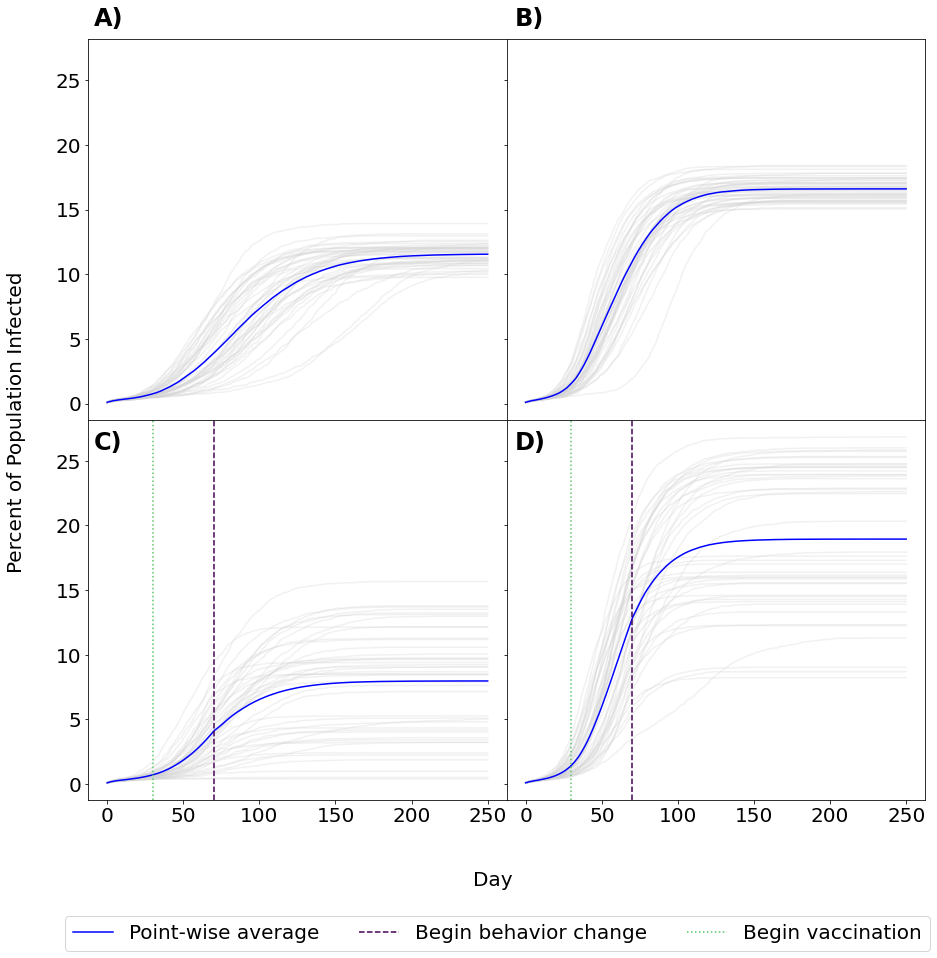

In [16]:
## Compare intervention on best/worst case scenarios

x = np.linspace(0,250,250)

fig = plt.figure(figsize = (15,14))
gs = fig.add_gridspec(2, 2, hspace=0.0, wspace=0.0)
((ax1, ax2), (ax3, ax4)) = gs.subplots(sharex='col', sharey=True)
fig.text(0.5, 0.04, 'Day', ha='center')
fig.text(0.05, 0.5, 'Percent of Population Infected', va='center', rotation='vertical')

ax_list = [ax1, ax2, ax3, ax4]
df_list = [best_0_mean, worst_0_mean, best_2_mean, worst_2_mean]

for i in range(len(best0[6:,0])):
    ax1.plot(x, best0[i,6:]/div_by, color = 'lightgray', alpha = 0.3)
    ax2.plot(x, worst0[i,6:]/div_by, color = 'lightgray', alpha = 0.3)
    ax3.plot(x, best2[i,6:]/div_by, color = 'lightgray', alpha = 0.3)
    ax4.plot(x, worst2[i,6:]/div_by, color = 'lightgray', alpha = 0.3)
    
ax1.plot(x, best_0_mean/div_by, color = 'blue')
ax2.plot(x, worst_0_mean/div_by, color = 'blue')
ax3.plot(x, best_2_mean/div_by, color = 'blue')
ax4.plot(x, worst_2_mean/div_by, color = 'blue', label = "Point-wise average")

for ax in [ax3, ax4]:
    ax.axvline(x = 70, color = "#440154FF", alpha = 1, linestyle = "dashed", label = "Begin behavior change")
    
for ax in [ax3, ax4]:
    ax.axvline(x = 30, color = '#55C667FF', alpha = 1, linestyle = "dotted", label = "Begin vaccination")

    
# Shrink current axis by 20%
box = ax4.get_position()

# Put a legend below the current axis
ax4.legend(loc='center left', bbox_to_anchor=(-1.08, -0.35), ncol = 3)

fig.text(0.13, 0.9, 'A)', va='center', fontweight = 'bold', fontsize = 24)
fig.text(0.52, 0.9, 'B)', va='center', fontweight = 'bold', fontsize = 24)
fig.text(0.13, 0.48, 'C)', va='center', fontweight = 'bold', fontsize = 24)
fig.text(0.52, 0.48, 'D)', va='center', fontweight = 'bold', fontsize = 24)

# Put a legend to the right of the current axis
plt.savefig('cumul_inf_base_beh_both_quar2.pdf', dpi=600, bbox_inches = "tight")

# Print out results to put in text
print("Top Left, mean (IQR): ", best_0_mean[-1]/div_by, np.percentile(best0[:,-1]/div_by, [25, 50, 75]))
print("Top Right, mean (IQR): ", worst_0_mean[-1]/div_by, np.percentile(worst0[:,-1]/div_by, [25, 50, 75]))
# Print out results to put in text
print("Bottom Left, mean (IQR): ", best_2_mean[-1]/div_by, np.percentile(best2[:,-1]/div_by, [25, 50, 75]))
print("Bottom Right, mean (IQR): ", worst_2_mean[-1]/div_by, np.percentile(worst2[:,-1]/div_by, [25, 50, 75]))

plt.savefig('bestworst_scenarios.pdf', dpi=600, bbox_inches = "tight")

## Clustering

In [4]:
reps = 50
date = '2025-01-28'

res = []

for d in range(reps):
    j = d+1
    with open(str('/n/home04/ecrenshaw/mpox/output/clustering_SUPPLEMENT/clustering_results_' + str(j) + '_' + str(date) + '.pkl'), 'rb') as file: 
        # A new file will be created 
        res.append(pickle.load(file) )

In [ ]:
# N, behavior change, rep, day, transitivity, avg clustering, LCC size, mean degree, max degree

In [5]:
res_mat = np.array(res).reshape(5000,9)

n5_clust = res_mat[res_mat[:,0]==5000]
n10_clust = res_mat[res_mat[:,0]==10000]
n20_clust = res_mat[res_mat[:,0]==20000]
n40_clust = res_mat[res_mat[:,0]==40000]
n80_clust = res_mat[res_mat[:,0]==80000]

In [6]:
n5_d28 = n5_clust[n5_clust[:,3]==28]
n10_d28 = n10_clust[n10_clust[:,3]==28]
n20_d28 = n20_clust[n20_clust[:,3]==28]
n40_d28 = n40_clust[n40_clust[:,3]==28]
n80_d28 = n80_clust[n80_clust[:,3]==28]

n5_d84 = n5_clust[n5_clust[:,3]==84]
n10_d84 = n10_clust[n10_clust[:,3]==84]
n20_d84 = n20_clust[n20_clust[:,3]==84]
n40_d84 = n40_clust[n40_clust[:,3]==84]
n80_d84 = n80_clust[n80_clust[:,3]==84]

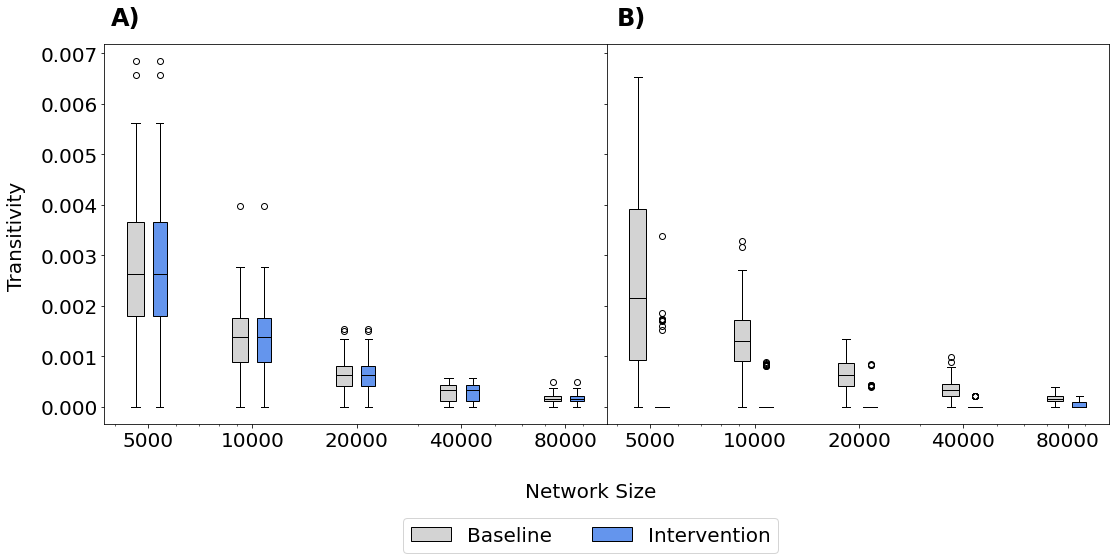

In [7]:
# Average transitivity

d28_0 = [n5_d28[n5_d28[:, 1]==0][:,4], n10_d28[n10_d28[:, 1]==0][:,4], n20_d28[n20_d28[:, 1]==0][:,4], n40_d28[n40_d28[:, 1]==0][:,4], n80_d28[n80_d28[:, 1]==0][:,4]]
d28_2 = [n5_d28[n5_d28[:, 1]==2][:,4], n10_d28[n10_d28[:, 1]==2][:,4], n20_d28[n20_d28[:, 1]==2][:,4], n40_d28[n40_d28[:, 1]==2][:,4], n80_d28[n80_d28[:, 1]==2][:,4]]

d84_0 = [n5_d84[n5_d84[:, 1]==0][:,4], n10_d84[n10_d84[:, 1]==0][:,4], n20_d84[n20_d84[:, 1]==0][:,4], n40_d84[n40_d84[:, 1]==0][:,4], n80_d84[n80_d84[:, 1]==0][:,4]]
d84_2 = [n5_d84[n5_d84[:, 1]==2][:,4], n10_d84[n10_d84[:, 1]==2][:,4], n20_d84[n20_d84[:, 1]==2][:,4], n40_d84[n40_d84[:, 1]==2][:,4], n80_d84[n80_d84[:, 1]==2][:,4]]

# X-axis positions
x_positions = [5000, 10000, 20000, 40000, 80000]
x_offset = [400, 800, 1600, 3200, 6400]

fig, axes = plt.subplots(1, 2, figsize=(18,7), sharey=True)
plt.subplots_adjust(wspace=0)

# Left panel - 28-day data
base_28 = axes[0].boxplot(d28_0, positions=[x - y for x, y in zip(x_positions, x_offset)],
                           widths=0.1 * np.array(x_positions), patch_artist=True)
intervention_28 = axes[0].boxplot(d28_2, positions=[x + y for x, y in zip(x_positions, x_offset)],
                                  widths=0.1 * np.array(x_positions), patch_artist=True)

for patch in base_28['boxes']:
    patch.set_facecolor('lightgray')
for median in base_28['medians']:
    median.set_color('black')
for patch in intervention_28['boxes']:
    patch.set_facecolor('cornflowerblue')
for median in intervention_28['medians']:
    median.set_color('black')

axes[0].set_xscale('log')
axes[0].set_xticks(x_positions)
axes[0].set_xticklabels([str(x) for x in x_positions])
#axes[0].set_title("28-Day Data")

# Right panel - 84-day data
base_84 = axes[1].boxplot(d84_0, positions=[x - y for x, y in zip(x_positions, x_offset)],
                           widths=0.1 * np.array(x_positions), patch_artist=True)
intervention_84 = axes[1].boxplot(d84_2, positions=[x + y for x, y in zip(x_positions, x_offset)],
                                  widths=0.1 * np.array(x_positions), patch_artist=True)

for patch in base_84['boxes']:
    patch.set_facecolor('lightgray')
for median in base_84['medians']:
    median.set_color('black')
for patch in intervention_84['boxes']:
    patch.set_facecolor('cornflowerblue')
for median in intervention_84['medians']:
    median.set_color('black')

axes[1].set_xscale('log')
axes[1].set_xticks(x_positions)
axes[1].set_xticklabels([str(x) for x in x_positions])
#axes[1].set_title("84-Day Data")

# Common legend
fig.legend([base_28["boxes"][0], intervention_28["boxes"][0]], ['Baseline', 'Intervention'],
           loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=2)

fig.text(0.13, 0.93, 'A)', va='center', fontweight = 'bold', fontsize = 24)
fig.text(0.52,0.93, 'B)', va='center', fontweight = 'bold', fontsize = 24)

fig.text(0.5, -0.02, 'Network Size', ha='center')
fig.text(0.05, 0.5, 'Transitivity', va='center', rotation='vertical')

plt.savefig("transitivity.pdf", dpi=600, bbox_inches = "tight")

plt.show()

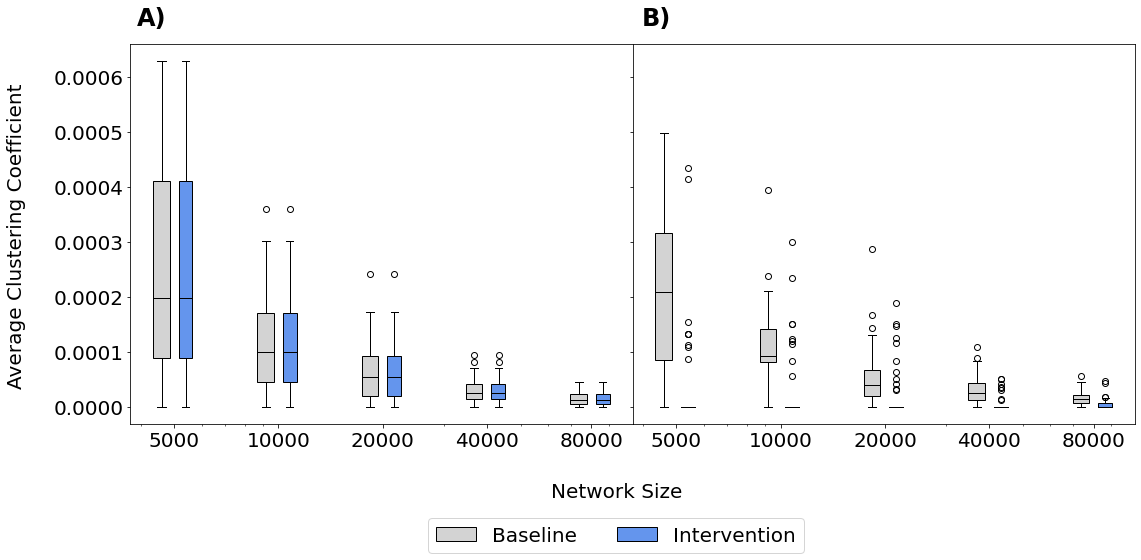

In [50]:
# Average clustering

d28_0 = [n5_d28[n5_d28[:, 1]==0][:,5], n10_d28[n10_d28[:, 1]==0][:,5], n20_d28[n20_d28[:, 1]==0][:,5], n40_d28[n40_d28[:, 1]==0][:,5], n80_d28[n80_d28[:, 1]==0][:,5]]
d28_2 = [n5_d28[n5_d28[:, 1]==2][:,5], n10_d28[n10_d28[:, 1]==2][:,5], n20_d28[n20_d28[:, 1]==2][:,5], n40_d28[n40_d28[:, 1]==2][:,5], n80_d28[n80_d28[:, 1]==2][:,5]]

d84_0 = [n5_d84[n5_d84[:, 1]==0][:,5], n10_d84[n10_d84[:, 1]==0][:,5], n20_d84[n20_d84[:, 1]==0][:,5], n40_d84[n40_d84[:, 1]==0][:,5], n80_d84[n80_d84[:, 1]==0][:,5]]
d84_2 = [n5_d84[n5_d84[:, 1]==2][:,5], n10_d84[n10_d84[:, 1]==2][:,5], n20_d84[n20_d84[:, 1]==2][:,5], n40_d84[n40_d84[:, 1]==2][:,5], n80_d84[n80_d84[:, 1]==2][:,5]]

# 0 doesn't plot well on the log scale, replace with -10 for plotting purposes
#d28_0_plot = [[10**-10 if num < 10**-10 else num for num in x] for x in d28_0]
#d28_2_plot = [[10**-10 if num < 10**-10 else num for num in x] for x in d28_2]
#d84_0_plot = [[10**-10 if num < 10**-10 else num for num in x] for x in d84_0]
#d84_2_plot = [[10**-10 if num< 10**-10 else num for num in x] for x in d84_2]

# X-axis positions
x_positions = [5000, 10000, 20000, 40000, 80000]
x_offset = [400, 800, 1600, 3200, 6400]

fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=True)
plt.subplots_adjust(wspace=0)

# Left panel - 28-day data
base_28 = axes[0].boxplot(d28_0_plot, positions=[x - y for x, y in zip(x_positions, x_offset)],
                           widths=0.1 * np.array(x_positions), patch_artist=True)
intervention_28 = axes[0].boxplot(d28_2_plot, positions=[x + y for x, y in zip(x_positions, x_offset)],
                                  widths=0.1 * np.array(x_positions), patch_artist=True)

for patch in base_28['boxes']:
    patch.set_facecolor('lightgray')
for median in base_28['medians']:
    median.set_color('black')
for patch in intervention_28['boxes']:
    patch.set_facecolor('cornflowerblue')
for median in intervention_28['medians']:
    median.set_color('black')

#axes[0].set_yscale('symlog')
#axes[0].set_ylim(10**-10, 0.001)
axes[0].set_xscale('log')
axes[0].set_xticks(x_positions)
axes[0].set_xticklabels([str(x) for x in x_positions])
#axes[0].set_title("28-Day Data")

# Right panel - 84-day data
base_84 = axes[1].boxplot(d84_0_plot, positions=[x - y for x, y in zip(x_positions, x_offset)],
                           widths=0.1 * np.array(x_positions), patch_artist=True)
intervention_84 = axes[1].boxplot(d84_2_plot, positions=[x + y for x, y in zip(x_positions, x_offset)],
                                  widths=0.1 * np.array(x_positions), patch_artist=True)

for patch in base_84['boxes']:
    patch.set_facecolor('lightgray')
for median in base_84['medians']:
    median.set_color('black')
for patch in intervention_84['boxes']:
    patch.set_facecolor('cornflowerblue')
for median in intervention_84['medians']:
    median.set_color('black')

#axes[0].set_yscale('symlog')
axes[1].set_xscale('log')
axes[1].set_xticks(x_positions)
axes[1].set_xticklabels([str(x) for x in x_positions])
#axes[1].set_title("84-Day Data")

# Common legend
fig.legend([base_28["boxes"][0], intervention_28["boxes"][0]], ['Baseline', 'Intervention'],
           loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=2)

fig.text(0.13, 0.93, 'A)', va='center', fontweight = 'bold', fontsize = 24)
fig.text(0.52,0.93, 'B)', va='center', fontweight = 'bold', fontsize = 24)

fig.text(0.5, -0.02, 'Network Size', ha='center')
fig.text(0.03, 0.5, 'Average Clustering Coefficient', va='center', rotation='vertical')

plt.savefig("clustering_coeff.pdf", dpi=600, bbox_inches = "tight")
plt.show()

In [51]:
d28_0_plot = [[10**-10 if num < 10**-10 else num for num in x] for x in d28_0]
yval = [item for sublist in d28_0_plot for item in sublist]
x = [item for item in x_positions for _ in range(50)]

sp.linregress(np.log10(x), np.log10(yval))

LinregressResult(slope=-1.107851428709258, intercept=0.050828219667900854, rvalue=-0.30122494643149655, pvalue=1.2217191279970136e-06, stderr=0.2226945723899628, intercept_stderr=0.9624965855028135)

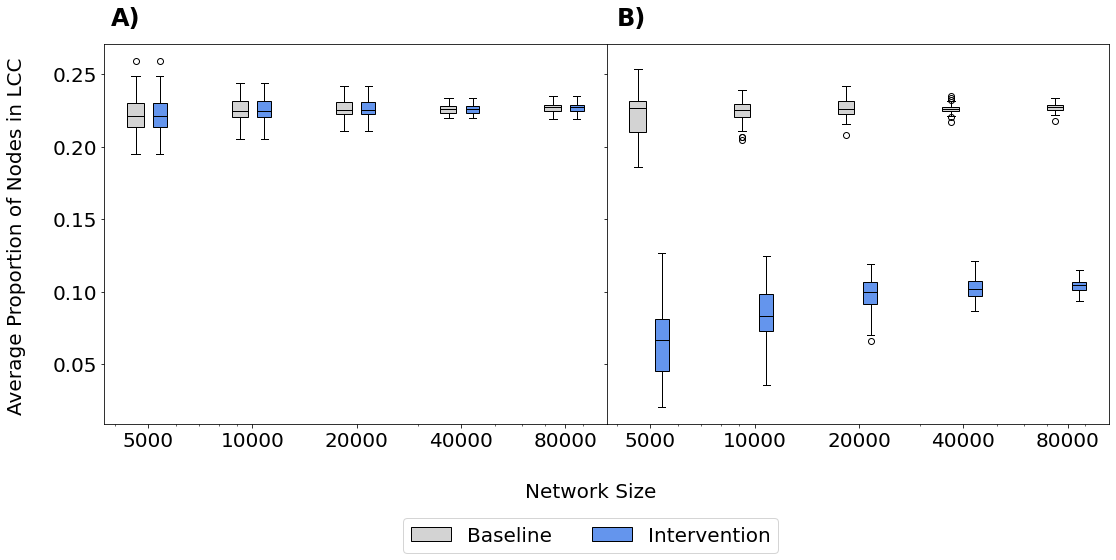

In [56]:
# % of nodes in LCC

d28_0 = [n5_d28[n5_d28[:, 1]==0][:,6]/5000, n10_d28[n10_d28[:, 1]==0][:,6]/10000, n20_d28[n20_d28[:, 1]==0][:,6]/20000, n40_d28[n40_d28[:, 1]==0][:,6]/40000, n80_d28[n80_d28[:, 1]==0][:,6]/80000]
d28_2 = [n5_d28[n5_d28[:, 1]==2][:,6]/5000, n10_d28[n10_d28[:, 1]==2][:,6]/10000, n20_d28[n20_d28[:, 1]==2][:,6]/20000, n40_d28[n40_d28[:, 1]==2][:,6]/40000, n80_d28[n80_d28[:, 1]==2][:,6]/80000]

d84_0 = [n5_d84[n5_d84[:, 1]==0][:,6]/5000, n10_d84[n10_d84[:, 1]==0][:,6]/10000, n20_d84[n20_d84[:, 1]==0][:,6]/20000, n40_d84[n40_d84[:, 1]==0][:,6]/40000, n80_d84[n80_d84[:, 1]==0][:,6]/80000]
d84_2 = [n5_d84[n5_d84[:, 1]==2][:,6]/5000, n10_d84[n10_d84[:, 1]==2][:,6]/10000, n20_d84[n20_d84[:, 1]==2][:,6]/20000, n40_d84[n40_d84[:, 1]==2][:,6]/40000, n80_d84[n80_d84[:, 1]==2][:,6]/80000]

# X-axis positions
x_positions = [5000, 10000, 20000, 40000, 80000]
x_offset = [400, 800, 1600, 3200, 6400]

fig, axes = plt.subplots(1, 2, figsize=(18,7), sharey=True)
plt.subplots_adjust(wspace=0)

# Left panel - 28-day data
base_28 = axes[0].boxplot(d28_0, positions=[x - y for x, y in zip(x_positions, x_offset)],
                           widths=0.1 * np.array(x_positions), patch_artist=True)
intervention_28 = axes[0].boxplot(d28_2, positions=[x + y for x, y in zip(x_positions, x_offset)],
                                  widths=0.1 * np.array(x_positions), patch_artist=True)

for patch in base_28['boxes']:
    patch.set_facecolor('lightgray')
for median in base_28['medians']:
    median.set_color('black')
for patch in intervention_28['boxes']:
    patch.set_facecolor('cornflowerblue')
for median in intervention_28['medians']:
    median.set_color('black')

axes[0].set_xscale('log')
axes[0].set_xticks(x_positions)
axes[0].set_xticklabels([str(x) for x in x_positions])
#axes[0].set_title("28-Day Data")

# Right panel - 84-day data
base_84 = axes[1].boxplot(d84_0, positions=[x - y for x, y in zip(x_positions, x_offset)],
                           widths=0.1 * np.array(x_positions), patch_artist=True)
intervention_84 = axes[1].boxplot(d84_2, positions=[x + y for x, y in zip(x_positions, x_offset)],
                                  widths=0.1 * np.array(x_positions), patch_artist=True)

for patch in base_84['boxes']:
    patch.set_facecolor('lightgray')
for median in base_84['medians']:
    median.set_color('black')
for patch in intervention_84['boxes']:
    patch.set_facecolor('cornflowerblue')
for median in intervention_84['medians']:
    median.set_color('black')

axes[1].set_xscale('log')
axes[1].set_xticks(x_positions)
axes[1].set_xticklabels([str(x) for x in x_positions])
#axes[1].set_title("84-Day Data")

# Common legend
fig.legend([base_28["boxes"][0], intervention_28["boxes"][0]], ['Baseline', 'Intervention'],
           loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=2)

fig.text(0.13, 0.93, 'A)', va='center', fontweight = 'bold', fontsize = 24)
fig.text(0.52,0.93, 'B)', va='center', fontweight = 'bold', fontsize = 24)

fig.text(0.5, -0.02, 'Network Size', ha='center')
fig.text(0.05, 0.5, 'Average Proportion of Nodes in LCC', va='center', rotation='vertical')

plt.savefig("perc_LCC.pdf", dpi=600, bbox_inches = "tight")

plt.show()

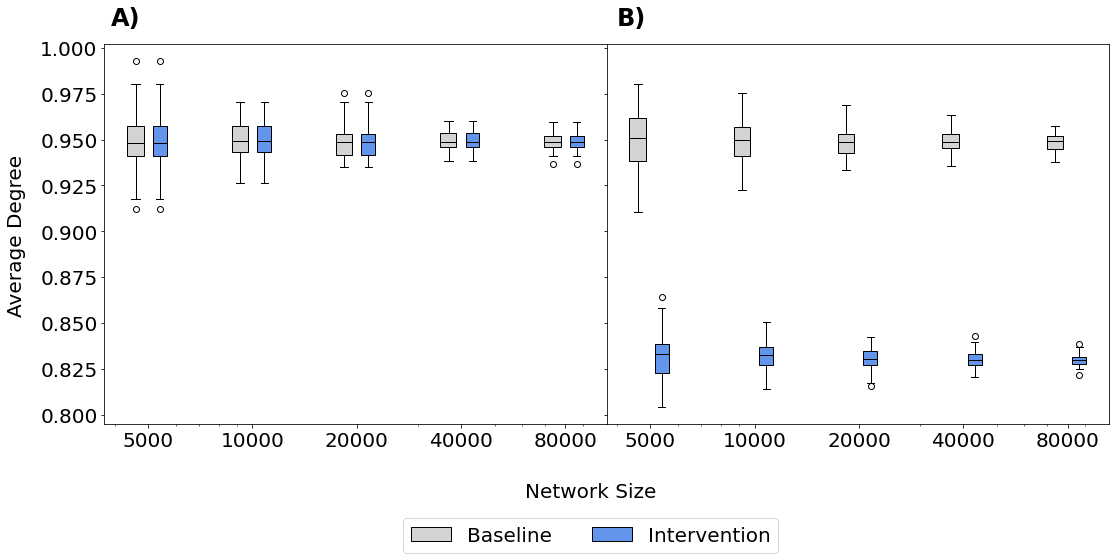

In [57]:
d28_0 = [n5_d28[n5_d28[:, 1]==0][:,7], n10_d28[n10_d28[:, 1]==0][:,7], n20_d28[n20_d28[:, 1]==0][:,7], n40_d28[n40_d28[:, 1]==0][:,7], n80_d28[n80_d28[:, 1]==0][:,7]]
d28_2 = [n5_d28[n5_d28[:, 1]==2][:,7], n10_d28[n10_d28[:, 1]==2][:,7], n20_d28[n20_d28[:, 1]==2][:,7], n40_d28[n40_d28[:, 1]==2][:,7], n80_d28[n80_d28[:, 1]==2][:,7]]


d84_0 = [n5_d84[n5_d84[:, 1]==0][:,7], n10_d84[n10_d84[:, 1]==0][:,7], n20_d84[n20_d84[:, 1]==0][:,7], n40_d84[n40_d84[:, 1]==0][:,7], n80_d84[n80_d84[:, 1]==0][:,7]]
d84_2 = [n5_d84[n5_d84[:, 1]==2][:,7], n10_d84[n10_d84[:, 1]==2][:,7], n20_d84[n20_d84[:, 1]==2][:,7], n40_d84[n40_d84[:, 1]==2][:,7], n80_d84[n80_d84[:, 1]==2][:,7]]

# X-axis positions
x_positions = [5000, 10000, 20000, 40000, 80000]
x_offset = [400, 800, 1600, 3200, 6400]

fig, axes = plt.subplots(1, 2, figsize=(18,7), sharey=True)
plt.subplots_adjust(wspace=0)

# Left panel - 28-day data
base_28 = axes[0].boxplot(d28_0, positions=[x - y for x, y in zip(x_positions, x_offset)],
                           widths=0.1 * np.array(x_positions), patch_artist=True)
intervention_28 = axes[0].boxplot(d28_2, positions=[x + y for x, y in zip(x_positions, x_offset)],
                                  widths=0.1 * np.array(x_positions), patch_artist=True)

for patch in base_28['boxes']:
    patch.set_facecolor('lightgray')
for median in base_28['medians']:
    median.set_color('black')
for patch in intervention_28['boxes']:
    patch.set_facecolor('cornflowerblue')
for median in intervention_28['medians']:
    median.set_color('black')

axes[0].set_xscale('log')
axes[0].set_xticks(x_positions)
axes[0].set_xticklabels([str(x) for x in x_positions])
#axes[0].set_title("28-Day Data")

# Right panel - 84-day data
base_84 = axes[1].boxplot(d84_0, positions=[x - y for x, y in zip(x_positions, x_offset)],
                           widths=0.1 * np.array(x_positions), patch_artist=True)
intervention_84 = axes[1].boxplot(d84_2, positions=[x + y for x, y in zip(x_positions, x_offset)],
                                  widths=0.1 * np.array(x_positions), patch_artist=True)

for patch in base_84['boxes']:
    patch.set_facecolor('lightgray')
for median in base_84['medians']:
    median.set_color('black')
for patch in intervention_84['boxes']:
    patch.set_facecolor('cornflowerblue')
for median in intervention_84['medians']:
    median.set_color('black')

axes[1].set_xscale('log')
axes[1].set_xticks(x_positions)
axes[1].set_xticklabels([str(x) for x in x_positions])
#axes[1].set_title("84-Day Data")

# Common legend
fig.legend([base_28["boxes"][0], intervention_28["boxes"][0]], ['Baseline', 'Intervention'],
           loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=2)

fig.text(0.13, 0.93, 'A)', va='center', fontweight = 'bold', fontsize = 24)
fig.text(0.52,0.93, 'B)', va='center', fontweight = 'bold', fontsize = 24)

fig.text(0.5, -0.02, 'Network Size', ha='center')
fig.text(0.05, 0.5, 'Average Degree', va='center', rotation='vertical')

plt.savefig("mean_degree.pdf", dpi=600, bbox_inches = "tight")


plt.show()

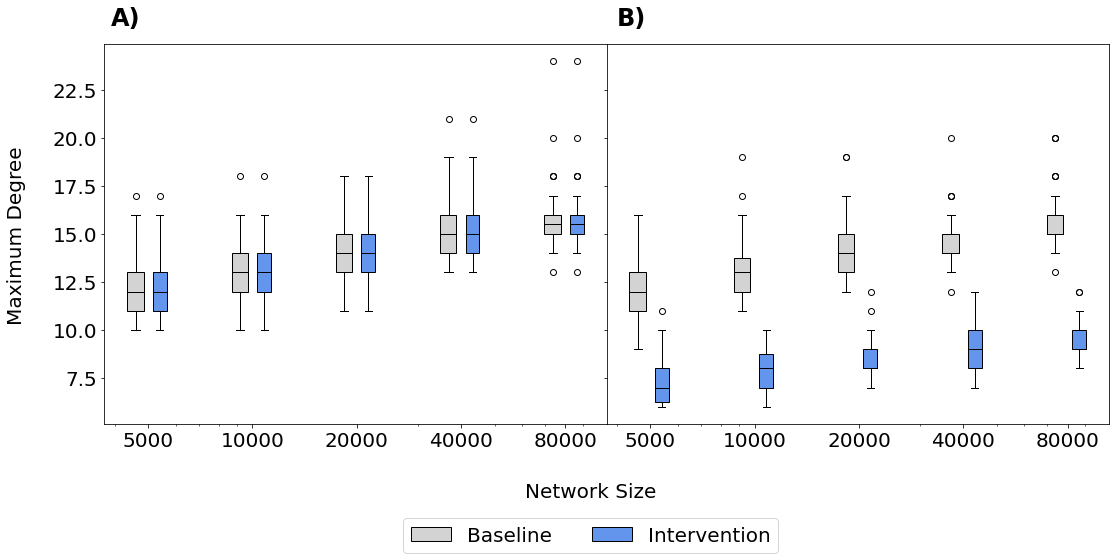

In [60]:
# Max degree

d28_0 = [n5_d28[n5_d28[:, 1]==0][:,8], n10_d28[n10_d28[:, 1]==0][:,8], n20_d28[n20_d28[:, 1]==0][:,8], n40_d28[n40_d28[:, 1]==0][:,8], n80_d28[n80_d28[:, 1]==0][:,8]]
d28_2 = [n5_d28[n5_d28[:, 1]==2][:,8], n10_d28[n10_d28[:, 1]==2][:,8], n20_d28[n20_d28[:, 1]==2][:,8], n40_d28[n40_d28[:, 1]==2][:,8], n80_d28[n80_d28[:, 1]==2][:,8]]

d84_0 = [n5_d84[n5_d84[:, 1]==0][:,8], n10_d84[n10_d84[:, 1]==0][:,8], n20_d84[n20_d84[:, 1]==0][:,8], n40_d84[n40_d84[:, 1]==0][:,8], n80_d84[n80_d84[:, 1]==0][:,8]]
d84_2 = [n5_d84[n5_d84[:, 1]==2][:,8], n10_d84[n10_d84[:, 1]==2][:,8], n20_d84[n20_d84[:, 1]==2][:,8], n40_d84[n40_d84[:, 1]==2][:,8], n80_d84[n80_d84[:, 1]==2][:,8]]

# X-axis positions
x_positions = [5000, 10000, 20000, 40000, 80000]
x_offset = [400, 800, 1600, 3200, 6400]

fig, axes = plt.subplots(1, 2, figsize=(18,7), sharey=True)
plt.subplots_adjust(wspace=0)

# Left panel - 28-day data
base_28 = axes[0].boxplot(d28_0, positions=[x - y for x, y in zip(x_positions, x_offset)],
                           widths=0.1 * np.array(x_positions), patch_artist=True)
intervention_28 = axes[0].boxplot(d28_2, positions=[x + y for x, y in zip(x_positions, x_offset)],
                                  widths=0.1 * np.array(x_positions), patch_artist=True)

for patch in base_28['boxes']:
    patch.set_facecolor('lightgray')
for median in base_28['medians']:
    median.set_color('black')
for patch in intervention_28['boxes']:
    patch.set_facecolor('cornflowerblue')
for median in intervention_28['medians']:
    median.set_color('black')

#axes[0].set_yscale('log')
axes[0].set_xscale('log')
axes[0].set_xticks(x_positions)
axes[0].set_xticklabels([str(x) for x in x_positions])
#axes[0].set_title("28-Day Data")

# Right panel - 84-day data
base_84 = axes[1].boxplot(d84_0, positions=[x - y for x, y in zip(x_positions, x_offset)],
                           widths=0.1 * np.array(x_positions), patch_artist=True)
intervention_84 = axes[1].boxplot(d84_2, positions=[x + y for x, y in zip(x_positions, x_offset)],
                                  widths=0.1 * np.array(x_positions), patch_artist=True)

for patch in base_84['boxes']:
    patch.set_facecolor('lightgray')
for median in base_84['medians']:
    median.set_color('black')
for patch in intervention_84['boxes']:
    patch.set_facecolor('cornflowerblue')
for median in intervention_84['medians']:
    median.set_color('black')

axes[1].set_xscale('log')
axes[1].set_xticks(x_positions)
axes[1].set_xticklabels([str(x) for x in x_positions])
#axes[1].set_title("84-Day Data")

# Common legend
fig.legend([base_28["boxes"][0], intervention_28["boxes"][0]], ['Baseline', 'Intervention'],
           loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=2)

fig.text(0.13, 0.93, 'A)', va='center', fontweight = 'bold', fontsize = 24)
fig.text(0.52,0.93, 'B)', va='center', fontweight = 'bold', fontsize = 24)

fig.text(0.5, -0.02, 'Network Size', ha='center')
fig.text(0.05, 0.5, 'Maximum Degree', va='center', rotation='vertical')

plt.savefig("max_deg.pdf", dpi=600, bbox_inches = "tight")

plt.show()

## Proportion of infections attributable to each relationship type (as boxplots)

In [19]:
sim_name = 'tracker_'
date = '2025-06-23'

num_sims = 100
steps = 250

intervention_start = [70]
intervention_start_name = '70'

behavior_change = 2
isolation = [0,1,2]
isolation_name = '012'

behavior_change_perc = 0.5
vax_scenario = 2
vax_delay_name = '30'
vax_delay = [30]

sim_string = str(intervention_start_name) + '-' + str(behavior_change) + '-' + str(behavior_change_perc) + \
      '-' + str(isolation_name) + '-' + str(vax_delay_name) + '-' + str(vax_scenario)
    
location = '/n/home04/ecrenshaw/mpox/output/' + sim_string + '/'

def calc_rstats(sim_string, want, N = 10000, num_sims = 100, steps = 250, intervention_start = [70], behavior_change = 2, isolation = [0,1,2], vax_delay = [30]):
    totnum = len(vax_delay)*len(intervention_start)*len(isolation)
    df = np.zeros((totnum,steps+3))

    rstar_list = list(range(0,258,7))
    print(rstar_list)


    # R_star, total
    r_tot = np.zeros((num_sims, len(rstar_list)))
    # R_star, one-time partnerships
    r_ot = np.zeros((num_sims, len(rstar_list)))
    # R_star, casual partnerships
    r_c = np.zeros((num_sims, len(rstar_list)))
    # R_star, main partnerships
    r_m = np.zeros((num_sims, len(rstar_list)))
    # Number of infections attributable to spread via one-time partnerships
    ot_infections = np.zeros((num_sims, steps))
    # Number of infections attributable to spread via one-time partnerships
    c_infections = np.zeros((num_sims, steps))
    # Number of infections attributable to spread via one-time partnerships
    m_infections = np.zeros((num_sims, steps))

    for i in range(0, num_sims):
        index = i + 1
        if index> 50:
            date = '2025-06-25'
        else:
            date = '2025-06-23'
            
        all_tracker = np.array(pd.read_csv(location + str(sim_name) + sim_string + '_'+ str(index) + '_' + date + '.csv'))

        start = want*N
        stop = start+N
        infection_tracker = all_tracker[start:stop,:]

        initial_infections = np.where(infection_tracker[:,0] == -1)[0].tolist()
        secondary_infections = np.where(np.isin(infection_tracker[:,0],initial_infections))[0].tolist()

        r_tot[i, 0] = len(secondary_infections)/len(initial_infections)
        r_ot[i, 0] = len(np.where(np.isin(infection_tracker[:,0],initial_infections) & (infection_tracker[:,3]==3))[0].tolist())/len(initial_infections)
        r_c[i, 0] = len(np.where(np.isin(infection_tracker[:,0],initial_infections) & (infection_tracker[:,3]==2))[0].tolist())/len(initial_infections)
        r_m[i, 0] = len(np.where(np.isin(infection_tracker[:,0],initial_infections) & (infection_tracker[:,3]==1))[0].tolist())/len(initial_infections)

        #Rstar
        for star in range(1,len(rstar_list)):
            infectious = np.where((infection_tracker[:,1] < rstar_list[star]) & (infection_tracker[:,2] > (rstar_list[star]-7)))[0].tolist()
            infected = np.where(np.isin(infection_tracker[:,0], infectious))[0].tolist()

            if len(infectious) > 0:
                r_tot[i,star] = len(infected)/len(infectious)
                r_ot[i,star] = len(np.where(np.isin(infection_tracker[:,0], infectious) & (infection_tracker[:,3]==3))[0].tolist()) / len(infectious)
                r_c[i,star] = len(np.where(np.isin(infection_tracker[:,0], infectious) & (infection_tracker[:,3]==2))[0].tolist()) / len(infectious)
                r_m[i,star] = len(np.where(np.isin(infection_tracker[:,0], infectious) & (infection_tracker[:,3]==1))[0].tolist()) / len(infectious)
            else: 
                r_tot[i,star] = 0
                r_ot[i,star] = 0
                r_c[i,star] = 0
                r_m[i,star] = 0

            # infections caused by one-time partners
            #print(len(np.where((infection_tracker[:,3]==3) & (infection_tracker[:,1] < rstar_list[star]))[0].tolist()))

        for j in range(0,steps):
            ot_infections[i, j] = len(np.where((infection_tracker[:,3]==3) & (infection_tracker[:,1] < j))[0].tolist())
            c_infections[i, j] = len(np.where((infection_tracker[:,3]==2) & (infection_tracker[:,1] < j))[0].tolist())
            m_infections[i, j] = len(np.where((infection_tracker[:,3]==1) & (infection_tracker[:,1] < j))[0].tolist())

    return(r_tot, r_ot, r_c, r_m, ot_infections, c_infections, m_infections)
        
# Get results under different isolation scenarios (1 = partial compliance, 2 = full compliance)

r_tot, r_ot, r_c, r_m, ot_infections, c_infections, m_infections = calc_rstats(sim_string, 1)
r_tot2, r_ot2, r_c2, r_m2, ot_infections2, c_infections2, m_infections2 = calc_rstats(sim_string, 2)

[0, 7, 14, 21, 28, 35, 42, 49, 56, 63, 70, 77, 84, 91, 98, 105, 112, 119, 126, 133, 140, 147, 154, 161, 168, 175, 182, 189, 196, 203, 210, 217, 224, 231, 238, 245, 252]
[0, 7, 14, 21, 28, 35, 42, 49, 56, 63, 70, 77, 84, 91, 98, 105, 112, 119, 126, 133, 140, 147, 154, 161, 168, 175, 182, 189, 196, 203, 210, 217, 224, 231, 238, 245, 252]


In [20]:
# Calculate the total number of infections
tot_infections = np.array([x+y+z for x,y,z in zip(ot_infections, c_infections, m_infections)])

tot_infections_fix = tot_infections.copy()
tot_infections_fix[tot_infections == 0] = 1 #change 0's to 1's in the denominator to avoid warnings (the numerator will be 0 if the denominator is anyway)

# Calculate the proprotion of infections attributable to spread via each relationship type
p_ot = ot_infections[:,:]/tot_infections_fix[:,:]
p_c = c_infections[:,:]/tot_infections_fix[:,:]
p_m = m_infections[:,:]/tot_infections_fix[:,:]

tot_infections2 = np.array([x+y+z for x,y,z in zip(ot_infections2, c_infections2, m_infections2)])

tot_infections_fix2 = tot_infections2.copy()
tot_infections_fix2[tot_infections_fix2 == 0] = 1

p_ot2 = ot_infections2[:,:]/tot_infections_fix2[:,:]
p_c2 = c_infections2[:,:]/tot_infections_fix2[:,:]
p_m2 = m_infections2[:,:]/tot_infections_fix2[:,:]

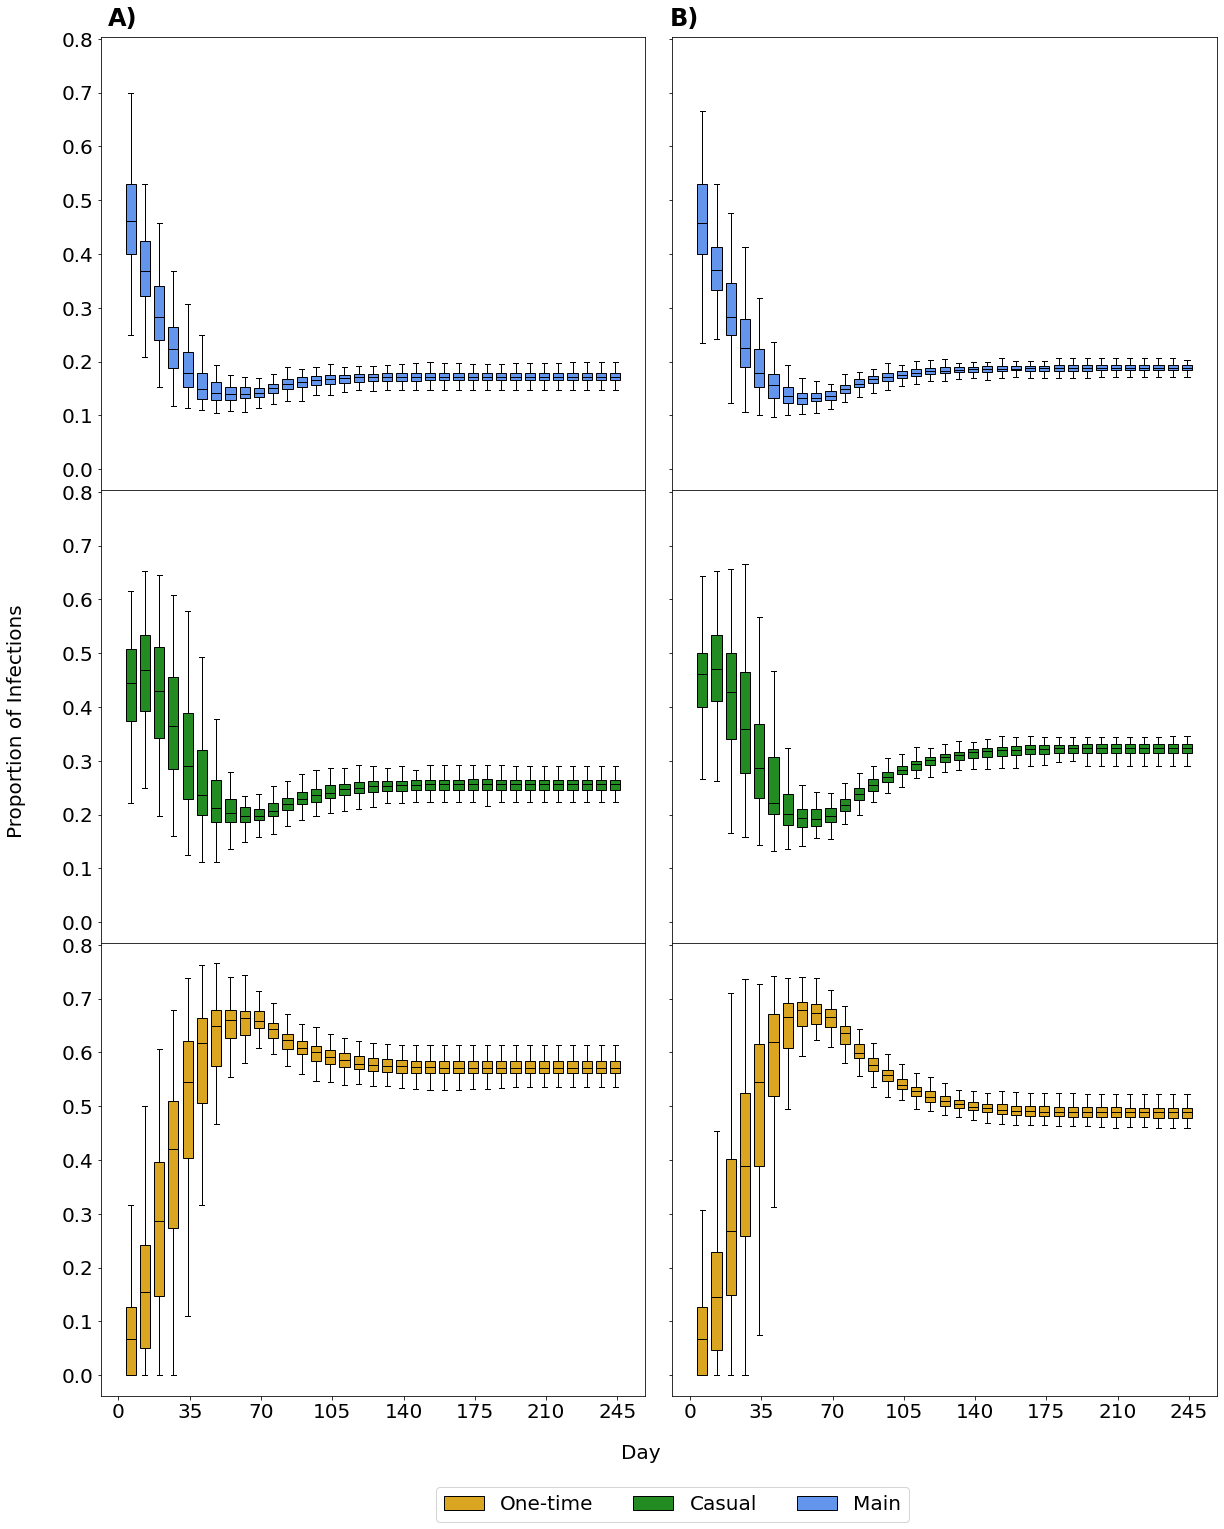

In [21]:
# Select data every 7 steps
days = np.arange(6, 250, 7)
p_m_selected = [p_m[:, i] for i in days]
p_c_selected = [p_c[:, i] for i in days]
p_ot_selected = [p_ot[:, i] for i in days]

p_m_selected2 = [p_m2[:, i] for i in days]
p_c_selected2 = [p_c2[:, i] for i in days]
p_ot_selected2 = [p_ot2[:, i] for i in days]


# Create figure and subplots
fig, axes = plt.subplots(3, 2, figsize=(20, 25), sharex=True, sharey = True)
#fig.suptitle("Proportion of Infections Over Time", fontsize=16)
plt.subplots_adjust(wspace=0.05, hspace=0.0)

box_width = 5

# Plot boxplots
boxm = axes[0,0].boxplot(p_m_selected, positions=days, widths=box_width, patch_artist=True, showfliers = False)
#axes[0,0].set_title("Main")
boxc = axes[1,0].boxplot(p_c_selected, positions=days, widths=box_width, patch_artist=True, showfliers = False)
#axes[1,0].set_title("Casual")
boxot = axes[2,0].boxplot(p_ot_selected, positions=days, widths=box_width, patch_artist=True, showfliers = False)
#axes[2,0].set_title("One-time")

boxm2 = axes[0,1].boxplot(p_m_selected2, positions=days, widths=box_width, patch_artist=True, showfliers = False)
#axes[0,1].set_title("Main")
boxc2 = axes[1,1].boxplot(p_c_selected2, positions=days, widths=box_width, patch_artist=True, showfliers = False)
#axes[1,1].set_title("Casual")
boxot2 = axes[2,1].boxplot(p_ot_selected2, positions=days, widths=box_width, patch_artist=True, showfliers = False)
#axes[2,1].set_title("One-time")


# Apply the fill color to each dataset   
for box in [boxc, boxc2]:
    for patch in box['boxes']:
        patch.set_facecolor('forestgreen')
    for median in box['medians']:
        median.set_color('black')
        
for box in [boxm, boxm2]:
    for patch in box['boxes']:
        patch.set_facecolor('cornflowerblue')
    for median in box['medians']:
        median.set_color('black')
        
for box in [boxot, boxot2]:
    for patch in box['boxes']:
        patch.set_facecolor('goldenrod')
    for median in box['medians']:
        median.set_color('black')

# Common labels
fig.text(0.5, 0.09, 'Day', ha='center')
fig.text(0.06, 0.5, 'Proportion of Infections', va='center', rotation='vertical')

plt.legend([boxot["boxes"][0], boxc["boxes"][0], boxm["boxes"][0]], 
          ['One-time', "Casual", "Main"], loc='lower center', bbox_to_anchor=(0, -0.3), ncol = 3) 

days2 = np.arange(0, 250, 35)

# Adjust x-axis
for ax in axes[2,:]:
    ax.set_xticks(days2)
    ax.set_xticklabels([str(d) for d in days2])

fig.text(0.13, 0.89, 'A)', va='center', fontweight = 'bold', fontsize = 24)
fig.text(0.52,0.89, 'B)', va='center', fontweight = 'bold', fontsize = 24)

plt.savefig('inf_source_bytype_beh2vax2_boxplots.pdf', dpi=600, bbox_inches = "tight")#


## Global sensitvity analysis heat maps

In [17]:
# Bring in data
path = "/n/home04/ecrenshaw/mpox/output/"

date = "2025-06-27"
neg = np.array(pd.read_csv(path+'30to110-2-bcpRange-12-0to-30-2_BWSUPPLEMENT/mpox_30to110-2-bcpRange-12-0to-30-2_BWSUPPLEMENT_' + date + '.csv'))
pos = np.array(pd.read_csv(path+'30to110-2-bcpRange-12-5to30-2_BW_SUPPLEMENT/mpox_30to110-2-bcpRange-12-5to30-2_BW_SUPPLEMENT_' + date + '.csv'))

## transmission probability = 0.5

date = "2025-06-27"
neg_lp = np.array(pd.read_csv(path+'30to110-2-bcpRange-12-0to-30-2_BW_lowprob_SUPPLEMENT/mpox_30to110-2-bcpRange-12-0to-30-2_BW_lowprob_SUPPLEMENT_' + date + '.csv'))
pos_lp = np.array(pd.read_csv(path+'30to110-2-bcpRange-12-5to30-2_BW_lowprob_SUPPLEMENT/mpox_30to110-2-bcpRange-12-5to30-2_BW_lowprob_SUPPLEMENT_' + date + '.csv'))



In [18]:
df = pd.concat([pd.DataFrame(neg[neg[:,1]!=0]),pd.DataFrame(pos[pos[:,1]!=0])], axis=0)
df_lp = pd.concat([pd.DataFrame(neg_lp[neg_lp[:,1]!=0]),pd.DataFrame(pos_lp[pos_lp[:,1]!=0])], axis=0)

# split by scenario
df75_w1 = df[(df[3] == 1) & (df[4] == 0) & (df[5] == 0.75)]
df75_b1 = df[(df[3] == 1) & (df[4] == 1) & (df[5] == 0.75)]
df5_w1 = df[(df[3] == 1) & (df[4] == 0) & (df[5] == 0.5)]
df5_b1 = df[(df[3] == 1) & (df[4] == 1) & (df[5] == 0.5)]
df25_w1 = df[(df[3] == 1) & (df[4] == 0) & (df[5] == 0.25)]
df25_b1 = df[(df[3] == 1) & (df[4] == 1) & (df[5] == 0.25)]

df75_w_lp1 = df_lp[(df_lp[3]) == 1 & (df_lp[4] == 0) & (df_lp[5] == 0.75)]
df75_b_lp1 = df_lp[(df_lp[3]) == 1 & (df_lp[4] == 1) & (df_lp[5] == 0.75)]
df5_w_lp1 = df_lp[(df_lp[3]) == 1 & (df_lp[4] == 0) & (df_lp[5] == 0.5)]
df5_b_lp1 = df_lp[(df_lp[3]) == 1 & (df_lp[4] == 1) & (df_lp[5] == 0.5)]
df25_w_lp1 = df_lp[(df_lp[3]) == 1 & (df_lp[4] == 0) & (df_lp[5] == 0.25)]
df25_b_lp1 = df_lp[(df_lp[3]) == 1 & (df_lp[4] == 1) & (df_lp[5] == 0.25)]

df75_w2 = df[(df[3] == 2) & (df[4] == 0) & (df[5] == 0.75)]
df75_b2 = df[(df[3] == 2) & (df[4] == 1) & (df[5] == 0.75)]
df5_w2 = df[(df[3] == 2) & (df[4] == 0) & (df[5] == 0.5)]
df5_b2 = df[(df[3] == 2) & (df[4] == 1) & (df[5] == 0.5)]
df25_w2 = df[(df[3] == 2) & (df[4] == 0) & (df[5] == 0.25)]
df25_b2 = df[(df[3] == 2) & (df[4] == 1) & (df[5] == 0.25)]

df75_w_lp2 = df_lp[(df_lp[3] == 2) & (df_lp[4] == 0) & (df_lp[5] == 0.75)]
df75_b_lp2 = df_lp[(df_lp[3] == 2) & (df_lp[4] == 1) & (df_lp[5] == 0.75)]
df5_w_lp2 = df_lp[(df_lp[3] == 2) & (df_lp[4] == 0) & (df_lp[5] == 0.5)]
df5_b_lp2 = df_lp[(df_lp[3] == 2) & (df_lp[4] == 1) & (df_lp[5] == 0.5)]
df25_w_lp2 = df_lp[(df_lp[3] == 2) & (df_lp[4] == 0) & (df_lp[5] == 0.25)]
df25_b_lp2 = df_lp[(df_lp[3] == 2) & (df_lp[4] == 1) & (df_lp[5] == 0.25)]

# get average over simulations

mean_df25_b1 = df25_b1.groupby(df25_b1.columns[[1,2,3,4,5]].tolist())[df25_b1.columns[6:]].mean()
mean_df5_b1 = df5_b1.groupby(df5_b1.columns[[1,2,3,4,5]].tolist())[df5_b1.columns[6:]].mean()
mean_df75_b1 = df75_b1.groupby(df75_b1.columns[[1,2,3,4,5]].tolist())[df75_b1.columns[6:]].mean()

mean_df25_w1 = df25_w1.groupby(df25_w1.columns[[1,2,3,4,5]].tolist())[df25_w1.columns[6:]].mean()
mean_df5_w1 = df5_w1.groupby(df5_w1.columns[[1,2,3,4,5]].tolist())[df5_w1.columns[6:]].mean()
mean_df75_w1 = df75_w1.groupby(df75_w1.columns[[1,2,3,4,5]].tolist())[df75_w1.columns[6:]].mean()

mean_df25_b2 = df25_b2.groupby(df25_b2.columns[[1,2,3,4,5]].tolist())[df25_b2.columns[6:]].mean()
mean_df5_b2 = df5_b2.groupby(df5_b2.columns[[1,2,3,4,5]].tolist())[df5_b2.columns[6:]].mean()
mean_df75_b2 = df75_b2.groupby(df75_b2.columns[[1,2,3,4,5]].tolist())[df75_b2.columns[6:]].mean()

mean_df25_w2 = df25_w2.groupby(df25_w2.columns[[1,2,3,4,5]].tolist())[df25_w2.columns[6:]].mean()
mean_df5_w2 = df5_w2.groupby(df5_w2.columns[[1,2,3,4,5]].tolist())[df5_w2.columns[6:]].mean()
mean_df75_w2 = df75_w2.groupby(df75_w2.columns[[1,2,3,4,5]].tolist())[df75_w2.columns[6:]].mean()

mean_df25_b_lp1 = df25_b_lp1.groupby(df25_b_lp1.columns[[1,2,3,4,5]].tolist())[df25_b_lp1.columns[6:]].mean()
mean_df5_b_lp1 = df5_b_lp1.groupby(df5_b_lp1.columns[[1,2,3,4,5]].tolist())[df5_b_lp1.columns[6:]].mean()
mean_df75_b_lp1 = df75_b_lp1.groupby(df75_b_lp1.columns[[1,2,3,4,5]].tolist())[df75_b_lp1.columns[6:]].mean()

mean_df25_w_lp1 = df25_w_lp1.groupby(df25_w_lp1.columns[[1,2,3,4,5]].tolist())[df25_w_lp1.columns[6:]].mean()
mean_df5_w_lp1 = df5_w_lp1.groupby(df5_w_lp1.columns[[1,2,3,4,5]].tolist())[df5_w_lp1.columns[6:]].mean()
mean_df75_w_lp1 = df75_w_lp1.groupby(df75_w_lp1.columns[[1,2,3,4,5]].tolist())[df75_w_lp1.columns[6:]].mean()

mean_df25_b_lp2 = df25_b_lp2.groupby(df25_b_lp2.columns[[1,2,3,4,5]].tolist())[df25_b_lp2.columns[6:]].mean()
mean_df5_b_lp2 = df5_b_lp2.groupby(df5_b_lp2.columns[[1,2,3,4,5]].tolist())[df5_b_lp2.columns[6:]].mean()
mean_df75_b_lp2 = df75_b_lp2.groupby(df75_b_lp2.columns[[1,2,3,4,5]].tolist())[df75_b_lp2.columns[6:]].mean()

mean_df25_w_lp2 = df25_w_lp2.groupby(df25_w_lp2.columns[[1,2,3,4,5]].tolist())[df25_w_lp2.columns[6:]].mean()
mean_df5_w_lp2 = df5_w_lp2.groupby(df5_w_lp2.columns[[1,2,3,4,5]].tolist())[df5_w_lp2.columns[6:]].mean()
mean_df75_w_lp2 = df75_w_lp2.groupby(df75_w_lp2.columns[[1,2,3,4,5]].tolist())[df75_w_lp2.columns[6:]].mean()

In [19]:
div_by = 10000/50 #number of nodes / number of simulations
keep_res25_b1 = mean_df25_b1.iloc[:,-1]/div_by
keep_res5_b1 = mean_df5_b1.iloc[:,-1]/div_by
keep_res75_b1 = mean_df75_b1.iloc[:,-1]/div_by

keep_res25_w1 = mean_df25_w1.iloc[:,-1]/div_by
keep_res5_w1 = mean_df5_w1.iloc[:,-1]/div_by
keep_res75_w1 = mean_df75_w1.iloc[:,-1]/div_by

keep_res25_b2 = mean_df25_b2.iloc[:,-1]/div_by
keep_res5_b2 = mean_df5_b2.iloc[:,-1]/div_by
keep_res75_b2 = mean_df75_b2.iloc[:,-1]/div_by

keep_res25_w2 = mean_df25_w2.iloc[:,-1]/div_by
keep_res5_w2 = mean_df5_w2.iloc[:,-1]/div_by
keep_res75_w2 = mean_df75_w2.iloc[:,-1]/div_by

keep_res25_b_lp1 = mean_df25_b_lp1.iloc[:,-1]/div_by
keep_res5_b_lp1 = mean_df5_b_lp1.iloc[:,-1]/div_by
keep_res75_b_lp1 = mean_df75_b_lp1.iloc[:,-1]/div_by

keep_res25_w_lp1 = mean_df25_w_lp1.iloc[:,-1]/div_by
keep_res5_w_lp1 = mean_df5_w_lp1.iloc[:,-1]/div_by
keep_res75_w_lp1 = mean_df75_w_lp1.iloc[:,-1]/div_by

keep_res25_b_lp2 = mean_df25_b_lp2.iloc[:,-1]/div_by
keep_res5_b_lp2 = mean_df5_b_lp2.iloc[:,-1]/div_by
keep_res75_b_lp2 = mean_df75_b_lp2.iloc[:,-1]/div_by

keep_res25_w_lp2 = mean_df25_w_lp2.iloc[:,-1]/div_by
keep_res5_w_lp2 = mean_df5_w_lp2.iloc[:,-1]/div_by
keep_res75_w_lp2 = mean_df75_w_lp2.iloc[:,-1]/div_by

In [20]:
mat25_b1 = keep_res25_b1.unstack(level=1)
mat5_b1 = keep_res5_b1.unstack(level=1)
mat75_b1 = keep_res75_b1.unstack(level=1)

mat25_w1 = keep_res25_w1.unstack(level=1)
mat5_w1 = keep_res5_w1.unstack(level=1)
mat75_w1 = keep_res75_w1.unstack(level=1)

mat25_b2 = keep_res25_b2.unstack(level=1)
mat5_b2 = keep_res5_b2.unstack(level=1)
mat75_b2 = keep_res75_b2.unstack(level=1)

mat25_w2 = keep_res25_w2.unstack(level=1)
mat5_w2 = keep_res5_w2.unstack(level=1)
mat75_w2 = keep_res75_w2.unstack(level=1)

mat25_b_lp1 = keep_res25_b_lp1.unstack(level=1)
mat5_b_lp1 = keep_res5_b_lp1.unstack(level=1)
mat75_b_lp1 = keep_res75_b_lp1.unstack(level=1)

mat25_w_lp1 = keep_res25_w_lp1.unstack(level=1)
mat5_w_lp1 = keep_res5_w_lp1.unstack(level=1)
mat75_w_lp1 = keep_res75_w_lp1.unstack(level=1)

mat25_b_lp2 = keep_res25_b_lp2.unstack(level=1)
mat5_b_lp2 = keep_res5_b_lp2.unstack(level=1)
mat75_b_lp2 = keep_res75_b_lp2.unstack(level=1)

mat25_w_lp2 = keep_res25_w_lp2.unstack(level=1)
mat5_w_lp2 = keep_res5_w_lp2.unstack(level=1)
mat75_w_lp2 = keep_res75_w_lp2.unstack(level=1)

In [21]:
# insert a blank row between -1 year and -30 days
def insert_nan_row(matrix):
    row_to_insert = np.full((1, matrix.shape[1]), np.nan)  # Create a row of NaNs
    matrix_with_nan = np.vstack([matrix[:2], row_to_insert, matrix[2:]])  # Insert NaN row between second and third rows
    return matrix_with_nan

# Apply the function to each of the matrices
mat25_b1_with_space = insert_nan_row(np.array(mat25_b1))
mat5_b1_with_space = insert_nan_row(np.array(mat5_b1))
mat75_b1_with_space = insert_nan_row(np.array(mat75_b1))

mat25_w1_with_space = insert_nan_row(np.array(mat25_w1))
mat5_w1_with_space = insert_nan_row(np.array(mat5_w1))
mat75_w1_with_space = insert_nan_row(np.array(mat75_w1))

mat25_b2_with_space = insert_nan_row(np.array(mat25_b2))
mat5_b2_with_space = insert_nan_row(np.array(mat5_b2))
mat75_b2_with_space = insert_nan_row(np.array(mat75_b2))

mat25_w2_with_space = insert_nan_row(np.array(mat25_w2))
mat5_w2_with_space = insert_nan_row(np.array(mat5_w2))
mat75_w2_with_space = insert_nan_row(np.array(mat75_w2))

mat25_b_lp1_with_space = insert_nan_row(np.array(mat25_b_lp1))
mat5_b_lp1_with_space = insert_nan_row(np.array(mat5_b_lp1))
mat75_b_lp1_with_space = insert_nan_row(np.array(mat75_b_lp1))

mat25_w_lp1_with_space = insert_nan_row(np.array(mat25_w_lp1))
mat5_w_lp1_with_space = insert_nan_row(np.array(mat5_w_lp1))
mat75_w_lp1_with_space = insert_nan_row(np.array(mat75_w_lp1))

mat25_b_lp2_with_space = insert_nan_row(np.array(mat25_b_lp2))
mat5_b_lp2_with_space = insert_nan_row(np.array(mat5_b_lp2))
mat75_b_lp2_with_space = insert_nan_row(np.array(mat75_b_lp2))

mat25_w_lp2_with_space = insert_nan_row(np.array(mat25_w_lp2))
mat5_w_lp2_with_space = insert_nan_row(np.array(mat5_w_lp2))
mat75_w_lp2_with_space = insert_nan_row(np.array(mat75_w_lp2))

In [22]:
# Calibrate the values over both heatmaps
values_hp = np.hstack([mat25_b1_with_space, mat5_b1_with_space, mat75_b1_with_space, 
                    mat25_w1_with_space, mat5_w1_with_space, mat75_w1_with_space,
                    mat25_b2_with_space, mat5_b2_with_space, mat75_b2_with_space, 
                    mat25_w2_with_space, mat5_w2_with_space, mat75_w2_with_space]).ravel().tolist()

values_hp2 = [x for x in values_hp if x == x]

norm_hp = mcolors.Normalize(np.min(values_hp2), np.max(values_hp2)) 

values_lp = np.hstack([mat25_b_lp1_with_space, mat5_b_lp1_with_space, mat75_b_lp1_with_space, 
                    mat25_w_lp1_with_space, mat5_w_lp1_with_space, mat75_w_lp1_with_space,
                    mat25_b_lp2_with_space, mat5_b_lp2_with_space, mat75_b_lp2_with_space, 
                    mat25_w_lp2_with_space, mat5_w_lp2_with_space, mat75_w_lp2_with_space]).ravel().tolist()

values_lp2 = [x for x in values_lp if x == x]

norm_lp = mcolors.Normalize(np.min(values_lp2), np.max(values_lp2)) 

# Calibrate the values over all heatmaps
values_all = np.hstack([mat25_b1_with_space, mat5_b1_with_space, mat75_b1_with_space, 
                    mat25_w1_with_space, mat5_w1_with_space, mat75_w1_with_space,
                    mat25_b2_with_space, mat5_b2_with_space, mat75_b2_with_space, 
                    mat25_w2_with_space, mat5_w2_with_space, mat75_w2_with_space,
                    mat25_b_lp1_with_space, mat5_b_lp1_with_space, mat75_b_lp1_with_space, 
                    mat25_w_lp1_with_space, mat5_w_lp1_with_space, mat75_w_lp1_with_space,
                    mat25_b_lp2_with_space, mat5_b_lp2_with_space, mat75_b_lp2_with_space, 
                    mat25_w_lp2_with_space, mat5_w_lp2_with_space, mat75_w_lp2_with_space]).ravel().tolist()

values_all2 = [x for x in values_all if x == x]

norm_all = mcolors.Normalize(np.min(values_all2), np.max(values_all2)) 


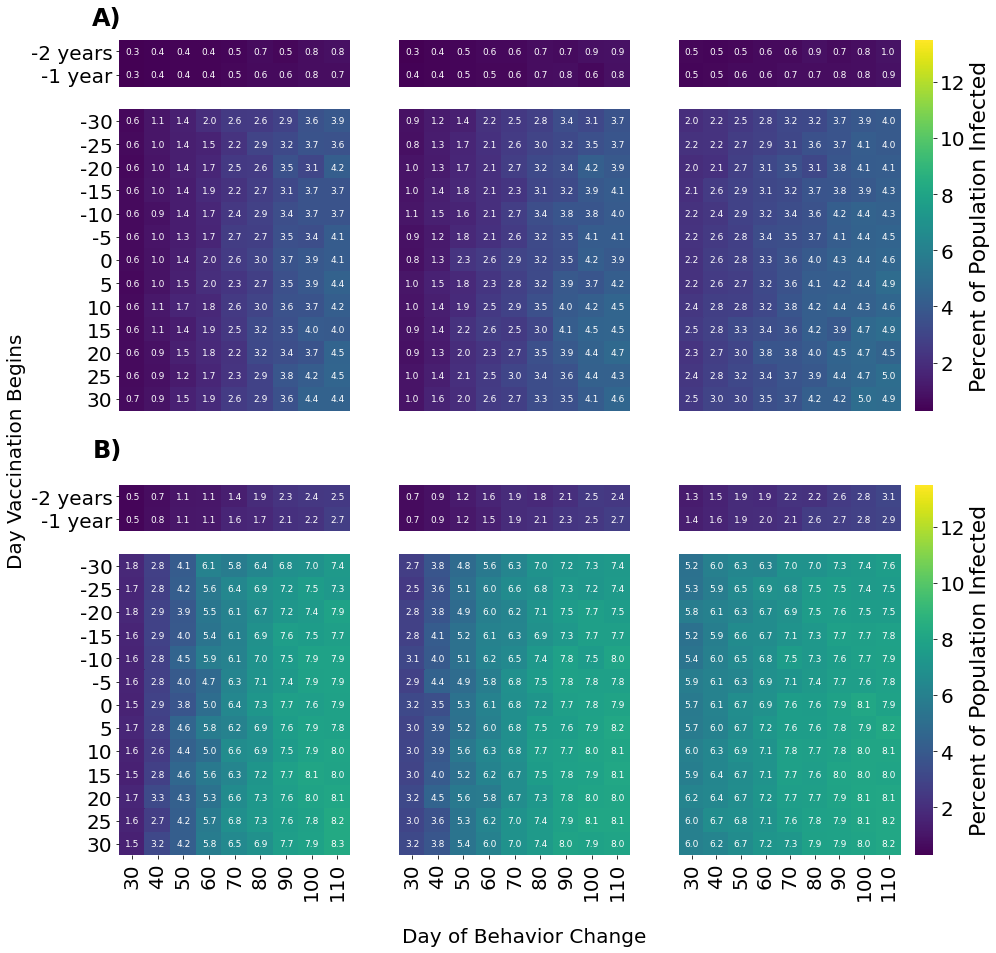

In [23]:
### Heatmap with best/worst infection parameters - isolation scenario 1 - high transmission probability

fig, ax = plt.subplots(2, 3, figsize = (15,15), gridspec_kw={'width_ratios': [1, 1, 1.2]})

## Row 1 = less optimistic isolation
sns.heatmap(mat25_b1_with_space, ax=ax[0,0], cmap='viridis', norm=norm_hp, cbar = False, annot=True, fmt=".1f", annot_kws={"fontsize":9},
            xticklabels = False,#xticklabels = [30,40,50,60,70,80,90,100,110], 
            yticklabels = ['-2 years', '-1 year', "",-30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30])
#ax[0,0].set(xlabel = "", ylabel = "",title = 'Behavior reduction: 75%')

sns.heatmap(mat5_b1_with_space, ax=ax[0,1], cmap='viridis', norm = norm_hp, cbar = False, annot=True, fmt=".1f",annot_kws={"fontsize":9},
            yticklabels = False, xticklabels = False)#, xticklabels = [30,40,50,60,70,80,90,100,110])
#ax[0,1].set(xlabel = "", ylabel = "",title = 'Behavior reduction: 50%')
            
sns.heatmap(mat75_b1_with_space, ax=ax[0,2], cmap='viridis', norm = norm_hp, annot=True, fmt=".1f",annot_kws={"fontsize":9},
            yticklabels = False, xticklabels = False,# xticklabels = [30,40,50,60,70,80,90,100,110],
           cbar_kws={'label': 'Percent of Population Infected'})
#ax[0,2].set(xlabel = "", ylabel = "",title = 'Behavior reduction: 25%')


## Row 2 = more optimisitc
sns.heatmap(mat25_w1_with_space, ax=ax[1,0], cmap='viridis', norm=norm_hp, cbar = False, annot=True, fmt=".1f", annot_kws={"fontsize":9},
            xticklabels = [30,40,50,60,70,80,90,100,110], 
            yticklabels = ['-2 years', '-1 year', "",-30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30])
#ax[1,0].set(xlabel = "", ylabel = "",title = 'Behavior reduction: 75%')

sns.heatmap(mat5_w1_with_space, ax=ax[1,1], cmap='viridis', norm = norm_hp, cbar = False, annot=True, fmt=".1f",annot_kws={"fontsize":9},
            yticklabels = False, xticklabels = [30,40,50,60,70,80,90,100,110])
#ax[1,1].set(xlabel = "", ylabel = "",title = 'Behavior reduction: 50%')
            
sns.heatmap(mat75_w1_with_space, ax=ax[1,2], cmap='viridis', norm = norm_hp, annot=True, fmt=".1f",annot_kws={"fontsize":9},
            yticklabels = False, xticklabels = [30,40,50,60,70,80,90,100,110],
           cbar_kws={'label': 'Percent of Population Infected'})
#ax[1,2].set(xlabel = "", ylabel = "",title = 'Behavior reduction: 25%')

fig.text(0.5, 0.05, 'Day of Behavior Change', ha='center', va='center')
fig.text(0.03, 0.5, 'Day Vaccination Begins', ha='center', va='center', rotation='vertical')

fig.text(0.1, 0.9, 'A)', va='center', fontweight = 'bold', fontsize = 24)
fig.text(0.1, 0.5, 'B)', va='center', fontweight = 'bold', fontsize = 24)

# put in small white boxes to hide the y axis tick mark for the empty row
rect = patches.Rectangle((-0.5, 2.3), 1, 0.5, linewidth=1, edgecolor='none', facecolor='white')
rect.set_clip_on(False)
rect.set_zorder(2)
ax[0,0].add_patch(rect)

rect2 = patches.Rectangle((-0.5, 2.3), 1, 0.5, linewidth=1, edgecolor='none', facecolor='white')
rect2.set_clip_on(False)
rect2.set_zorder(2)
ax[1,0].add_patch(rect2)

plt.savefig('/n/home04/ecrenshaw/mpox/create figures/heatmap_30to110_-2Yrto30_25to75_BW_isol1_highprob' + date + '.pdf', dpi=600, bbox_inches = "tight")

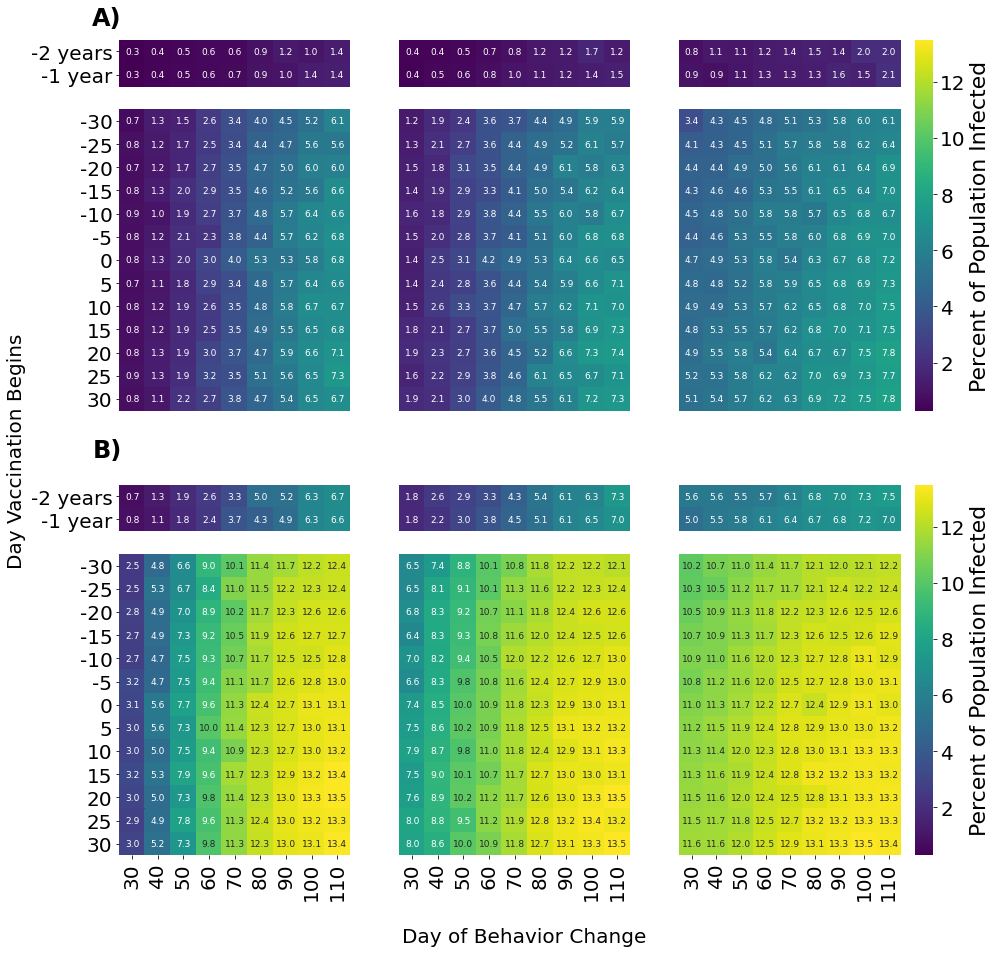

In [24]:
### Heatmap with best/worst infection parameters - isolation scenario 2 - high transmission probability

fig, ax = plt.subplots(2, 3, figsize = (15,15), gridspec_kw={'width_ratios': [1, 1, 1.2]})

## Row 1 = less optimistic isolation
sns.heatmap(mat25_b2_with_space, ax=ax[0,0], cmap='viridis', norm=norm_hp, cbar = False, annot=True, fmt=".1f", annot_kws={"fontsize":9},
            xticklabels = False,#xticklabels = [30,40,50,60,70,80,90,100,110], 
            yticklabels = ['-2 years', '-1 year', "",-30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30])
#ax[0,0].set(xlabel = "", ylabel = "",title = 'Behavior reduction: 75%')

sns.heatmap(mat5_b2_with_space, ax=ax[0,1], cmap='viridis', norm = norm_hp, cbar = False, annot=True, fmt=".1f",annot_kws={"fontsize":9},
            yticklabels = False, xticklabels = False)#, xticklabels = [30,40,50,60,70,80,90,100,110])
#ax[0,1].set(xlabel = "", ylabel = "",title = 'Behavior reduction: 50%')
            
sns.heatmap(mat75_b2_with_space, ax=ax[0,2], cmap='viridis', norm = norm_hp, annot=True, fmt=".1f",annot_kws={"fontsize":9},
            yticklabels = False, xticklabels = False,# xticklabels = [30,40,50,60,70,80,90,100,110],
           cbar_kws={'label': 'Percent of Population Infected'})
#ax[0,2].set(xlabel = "", ylabel = "",title = 'Behavior reduction: 25%')


## Row 2 = more optimisitc
sns.heatmap(mat25_w2_with_space, ax=ax[1,0], cmap='viridis', norm=norm_hp, cbar = False, annot=True, fmt=".1f", annot_kws={"fontsize":9},
            xticklabels = [30,40,50,60,70,80,90,100,110], 
            yticklabels = ['-2 years', '-1 year', "",-30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30])
#ax[1,0].set(xlabel = "", ylabel = "",title = 'Behavior reduction: 75%')

sns.heatmap(mat5_w2_with_space, ax=ax[1,1], cmap='viridis', norm = norm_hp, cbar = False, annot=True, fmt=".1f",annot_kws={"fontsize":9},
            yticklabels = False, xticklabels = [30,40,50,60,70,80,90,100,110])
#ax[1,1].set(xlabel = "", ylabel = "",title = 'Behavior reduction: 50%')
            
sns.heatmap(mat75_w2_with_space, ax=ax[1,2], cmap='viridis', norm = norm_hp, annot=True, fmt=".1f",annot_kws={"fontsize":9},
            yticklabels = False, xticklabels = [30,40,50,60,70,80,90,100,110],
           cbar_kws={'label': 'Percent of Population Infected'})
#ax[1,2].set(xlabel = "", ylabel = "",title = 'Behavior reduction: 25%')

fig.text(0.5, 0.05, 'Day of Behavior Change', ha='center', va='center')
fig.text(0.03, 0.5, 'Day Vaccination Begins', ha='center', va='center', rotation='vertical')

fig.text(0.1, 0.9, 'A)', va='center', fontweight = 'bold', fontsize = 24)
fig.text(0.1, 0.5, 'B)', va='center', fontweight = 'bold', fontsize = 24)

# put in small white boxes to hide the y axis tick mark for the empty row
rect = patches.Rectangle((-0.5, 2.3), 1, 0.5, linewidth=1, edgecolor='none', facecolor='white')
rect.set_clip_on(False)
rect.set_zorder(2)
ax[0,0].add_patch(rect)

rect2 = patches.Rectangle((-0.5, 2.3), 1, 0.5, linewidth=1, edgecolor='none', facecolor='white')
rect2.set_clip_on(False)
rect2.set_zorder(2)
ax[1,0].add_patch(rect2)

plt.savefig('/n/home04/ecrenshaw/mpox/create figures/heatmap_30to110_-2Yrto30_25to75_BW_isol2_highprob' + date + '.pdf', dpi=600, bbox_inches = "tight")

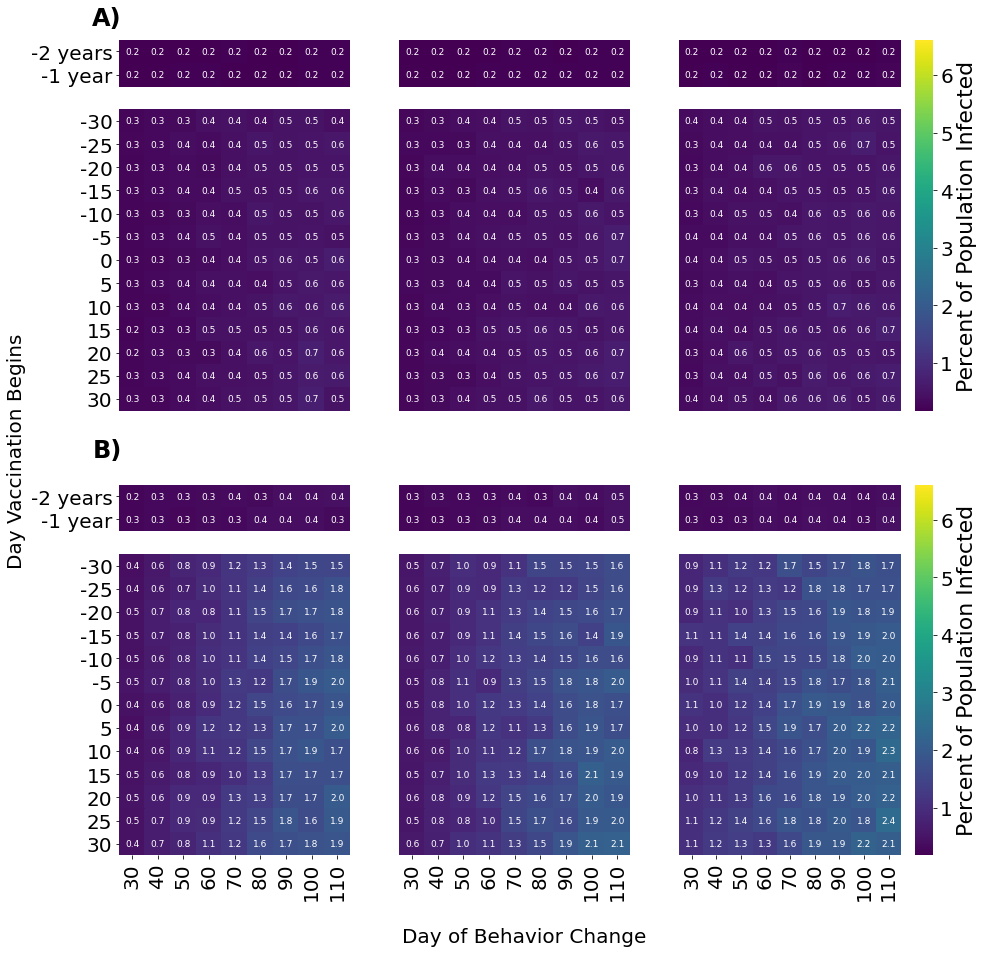

In [25]:
### Heatmap with best/worst infection parameters - isolation scenario 1 - low transmission probability

fig, ax = plt.subplots(2, 3, figsize = (15,15), gridspec_kw={'width_ratios': [1, 1, 1.2]})

## Row 1 = less optimistic isolation
sns.heatmap(mat25_b_lp1_with_space, ax=ax[0,0], cmap='viridis', norm=norm_lp, cbar = False, annot=True, fmt=".1f", annot_kws={"fontsize":9},
            xticklabels = False,#xticklabels = [30,40,50,60,70,80,90,100,110], 
            yticklabels = ['-2 years', '-1 year', "",-30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30])
#ax[0,0].set(xlabel = "", ylabel = "",title = 'Behavior reduction: 75%')

sns.heatmap(mat5_b_lp1_with_space, ax=ax[0,1], cmap='viridis', norm = norm_lp, cbar = False, annot=True, fmt=".1f",annot_kws={"fontsize":9},
            yticklabels = False, xticklabels = False)#, xticklabels = [30,40,50,60,70,80,90,100,110])
#ax[0,1].set(xlabel = "", ylabel = "",title = 'Behavior reduction: 50%')
            
sns.heatmap(mat75_b_lp1_with_space, ax=ax[0,2], cmap='viridis', norm = norm_lp, annot=True, fmt=".1f",annot_kws={"fontsize":9},
            yticklabels = False, xticklabels = False,# xticklabels = [30,40,50,60,70,80,90,100,110],
           cbar_kws={'label': 'Percent of Population Infected'})
#ax[0,2].set(xlabel = "", ylabel = "",title = 'Behavior reduction: 25%')


## Row 2 = more optimisitc
sns.heatmap(mat25_w_lp1_with_space, ax=ax[1,0], cmap='viridis', norm=norm_lp, cbar = False, annot=True, fmt=".1f", annot_kws={"fontsize":9},
            xticklabels = [30,40,50,60,70,80,90,100,110], 
            yticklabels = ['-2 years', '-1 year', "",-30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30])
#ax[1,0].set(xlabel = "", ylabel = "",title = 'Behavior reduction: 75%')

sns.heatmap(mat5_w_lp1_with_space, ax=ax[1,1], cmap='viridis', norm = norm_lp, cbar = False, annot=True, fmt=".1f",annot_kws={"fontsize":9},
            yticklabels = False, xticklabels = [30,40,50,60,70,80,90,100,110])
#ax[1,1].set(xlabel = "", ylabel = "",title = 'Behavior reduction: 50%')
            
sns.heatmap(mat75_w_lp1_with_space, ax=ax[1,2], cmap='viridis', norm = norm_lp, annot=True, fmt=".1f",annot_kws={"fontsize":9},
            yticklabels = False, xticklabels = [30,40,50,60,70,80,90,100,110],
           cbar_kws={'label': 'Percent of Population Infected'})
#ax[1,2].set(xlabel = "", ylabel = "",title = 'Behavior reduction: 25%')

fig.text(0.5, 0.05, 'Day of Behavior Change', ha='center', va='center')
fig.text(0.03, 0.5, 'Day Vaccination Begins', ha='center', va='center', rotation='vertical')

fig.text(0.1, 0.9, 'A)', va='center', fontweight = 'bold', fontsize = 24)
fig.text(0.1, 0.5, 'B)', va='center', fontweight = 'bold', fontsize = 24)

# put in small white boxes to hide the y axis tick mark for the empty row
rect = patches.Rectangle((-0.5, 2.3), 1, 0.5, linewidth=1, edgecolor='none', facecolor='white')
rect.set_clip_on(False)
rect.set_zorder(2)
ax[0,0].add_patch(rect)

rect2 = patches.Rectangle((-0.5, 2.3), 1, 0.5, linewidth=1, edgecolor='none', facecolor='white')
rect2.set_clip_on(False)
rect2.set_zorder(2)
ax[1,0].add_patch(rect2)

plt.savefig('/n/home04/ecrenshaw/mpox/create figures/heatmap_30to110_-2Yrto30_25to75_BW_isol1_lowprob' + date + '.pdf', dpi=600, bbox_inches = "tight")

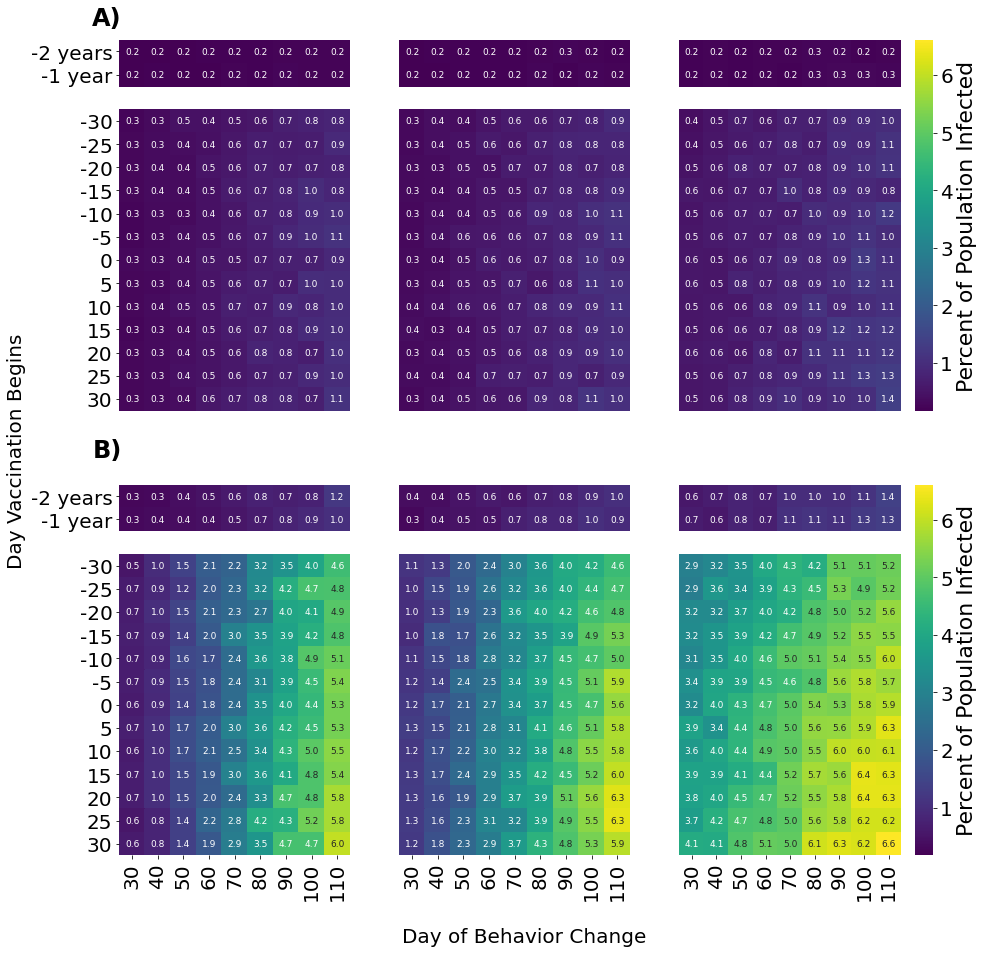

In [26]:
### Heatmap with best/worst infection parameters - isolation scenario 2 - low transmission probability

fig, ax = plt.subplots(2, 3, figsize = (15,15), gridspec_kw={'width_ratios': [1, 1, 1.2]})

## Row 1 = less optimistic isolation
sns.heatmap(mat25_b_lp2_with_space, ax=ax[0,0], cmap='viridis', norm=norm_lp, cbar = False, annot=True, fmt=".1f", annot_kws={"fontsize":9},
            xticklabels = False,#xticklabels = [30,40,50,60,70,80,90,100,110], 
            yticklabels = ['-2 years', '-1 year', "",-30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30])
#ax[0,0].set(xlabel = "", ylabel = "",title = 'Behavior reduction: 75%')

sns.heatmap(mat5_b_lp2_with_space, ax=ax[0,1], cmap='viridis', norm = norm_lp, cbar = False, annot=True, fmt=".1f",annot_kws={"fontsize":9},
            yticklabels = False, xticklabels = False)#, xticklabels = [30,40,50,60,70,80,90,100,110])
#ax[0,1].set(xlabel = "", ylabel = "",title = 'Behavior reduction: 50%')
            
sns.heatmap(mat75_b_lp2_with_space, ax=ax[0,2], cmap='viridis', norm = norm_lp, annot=True, fmt=".1f",annot_kws={"fontsize":9},
            yticklabels = False, xticklabels = False,# xticklabels = [30,40,50,60,70,80,90,100,110],
           cbar_kws={'label': 'Percent of Population Infected'})
#ax[0,2].set(xlabel = "", ylabel = "",title = 'Behavior reduction: 25%')


## Row 2 = more optimisitc
sns.heatmap(mat25_w_lp2_with_space, ax=ax[1,0], cmap='viridis', norm=norm_lp, cbar = False, annot=True, fmt=".1f", annot_kws={"fontsize":9},
            xticklabels = [30,40,50,60,70,80,90,100,110], 
            yticklabels = ['-2 years', '-1 year', "",-30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30])
#ax[1,0].set(xlabel = "", ylabel = "",title = 'Behavior reduction: 75%')

sns.heatmap(mat5_w_lp2_with_space, ax=ax[1,1], cmap='viridis', norm = norm_lp, cbar = False, annot=True, fmt=".1f",annot_kws={"fontsize":9},
            yticklabels = False, xticklabels = [30,40,50,60,70,80,90,100,110])
#ax[1,1].set(xlabel = "", ylabel = "",title = 'Behavior reduction: 50%')
            
sns.heatmap(mat75_w_lp2_with_space, ax=ax[1,2], cmap='viridis', norm = norm_lp, annot=True, fmt=".1f",annot_kws={"fontsize":9},
            yticklabels = False, xticklabels = [30,40,50,60,70,80,90,100,110],
           cbar_kws={'label': 'Percent of Population Infected'})
#ax[1,2].set(xlabel = "", ylabel = "",title = 'Behavior reduction: 25%')

fig.text(0.5, 0.05, 'Day of Behavior Change', ha='center', va='center')
fig.text(0.03, 0.5, 'Day Vaccination Begins', ha='center', va='center', rotation='vertical')

fig.text(0.1, 0.9, 'A)', va='center', fontweight = 'bold', fontsize = 24)
fig.text(0.1, 0.5, 'B)', va='center', fontweight = 'bold', fontsize = 24)

# put in small white boxes to hide the y axis tick mark for the empty row
rect = patches.Rectangle((-0.5, 2.3), 1, 0.5, linewidth=1, edgecolor='none', facecolor='white')
rect.set_clip_on(False)
rect.set_zorder(2)
ax[0,0].add_patch(rect)

rect2 = patches.Rectangle((-0.5, 2.3), 1, 0.5, linewidth=1, edgecolor='none', facecolor='white')
rect2.set_clip_on(False)
rect2.set_zorder(2)
ax[1,0].add_patch(rect2)

plt.savefig('/n/home04/ecrenshaw/mpox/create figures/heatmap_30to110_-2Yrto30_25to75_BW_isol2_lowprob' + date + '.pdf', dpi=600, bbox_inches = "tight")

### Compare different vaccine efficacy numbers

In [27]:
# Bring in data
path = "/n/home04/ecrenshaw/mpox/output/"

date3 = "2025-06-24"
date4 = "2025-06-25"

# standard vaccination parameters
neg5 = np.vstack((np.array(pd.read_csv(path+'30to110-2-0.5-2-0to-30-2/mpox_30to110-2-0.5-2-0to-30-2_' + date3 + '.csv')), 
                  np.array(pd.read_csv(path+'30to110-2-0.5-2-0to-30-2/mpox_30to110-2-0.5-2-0to-30-2_' + date4 + '.csv'))))
pos5 = np.vstack((np.array(pd.read_csv(path+'30to110-2-0.5-2-5to30-2/mpox_30to110-2-0.5-2-5to30-2_' + date3 + '.csv')),
                  np.array(pd.read_csv(path+'30to110-2-0.5-2-5to30-2/mpox_30to110-2-0.5-2-5to30-2_51.100_' + date4 + '.csv'))))

# more optimistic vaccination parameters

neg5_1 = np.array(pd.read_csv(path+'30to110-2-0.5-2-0to-30-2_vax2/mpox_30to110-2-0.5-2-0to-30-2_vax2_' + date4 + '.csv'))
pos5_1 = np.array(pd.read_csv(path+'30to110-2-0.5-2-5to30-2_vax2/mpox_30to110-2-0.5-2-5to30-2_vax2_' + date4 + '.csv'))


In [28]:
neg5 = pd.DataFrame(neg5[neg5[:,0]!=0])
pos5 = pd.DataFrame(pos5[pos5[:,0]!=0])
df5 = pd.concat([neg5,pos5], axis=0)


neg5_1 = pd.DataFrame(neg5_1[neg5_1[:,0]!=0])
pos5_1 = pd.DataFrame(pos5_1[pos5_1[:,0]!=0])
df5_1 = pd.concat([neg5_1,pos5_1], axis=0)


In [29]:
mean_df5 = df5.groupby(df5.columns[[1,2]].tolist())[df5.columns[3:]].mean()
mean_df5_1 = df5_1.groupby(df5_1.columns[[1,2]].tolist())[df5_1.columns[3:]].mean()

In [30]:
div_by = 10000/100 #number of nodes / number of simulations

keep_res5 = mean_df5.iloc[:,-1]/div_by
keep_res5_1 = mean_df5_1.iloc[:,-1]/div_by

In [31]:
mat5 = keep_res5.unstack(level=1)
mat5_1 = keep_res5_1.unstack(level=1)

# insert a blank row between -1 year and -30 days
def insert_nan_row(matrix):
    row_to_insert = np.full((1, matrix.shape[1]), np.nan)  # Create a row of NaNs
    matrix_with_nan = np.vstack([matrix[:2], row_to_insert, matrix[2:]])  # Insert NaN row between second and third rows
    return matrix_with_nan

# Apply the function to each of the matrices
mat5_with_space = insert_nan_row(np.array(mat5))
mat5_1_with_space = insert_nan_row(np.array(mat5_1))

In [32]:
# Calibrate the values over both heatmaps
values = np.hstack([mat5_with_space, mat5_1_with_space]).ravel().tolist()

values2 = [x for x in values if x == x]

norm = mcolors.Normalize(np.min(values2), np.max(values2)) 

In [ ]:
### Heatmap with both isolation options

fig, ax = plt.subplots(1, 2, figsize = (10,7), gridspec_kw={'width_ratios': [1, 1.2]})

## Row 1 = less optimistic isolation
sns.heatmap(mat5_with_space, ax=ax[0], cmap='viridis', norm=norm, cbar = False, annot=True, fmt=".1f", annot_kws={"fontsize":9},
            xticklabels = [30,40,50,60,70,80,90,100,110], 
            yticklabels = ['-2 years', '-1 year', "",-30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30])
#ax[0,0].set(xlabel = "", ylabel = "",title = 'Behavior reduction: 75%')

sns.heatmap(mat5_1_with_space, ax=ax[1], cmap='viridis', norm = norm, annot=True, fmt=".1f",annot_kws={"fontsize":9},
            yticklabels = False, xticklabels = [30,40,50,60,70,80,90,100,110], cbar_kws={'label': 'Percent of Population Infected'})
#ax[0,1].set(xlabel = "", ylabel = "",title = 'Behavior reduction: 50%')
            


fig.text(0.5, -0.05, 'Day of Behavior Change', ha='center', va='center')
fig.text(0.03, 0.5, 'Day Vaccination Begins', ha='center', va='center', rotation='vertical')

fig.text(0.1, 0.92, 'A)', va='center', fontweight = 'bold', fontsize = 24)
fig.text(0.5, 0.92, 'B)', va='center', fontweight = 'bold', fontsize = 24)

# put in small white boxes to hide the y axis tick mark for the empty row
rect = patches.Rectangle((-0.5, 2.3), 1, 0.5, linewidth=1, edgecolor='none', facecolor='white')
rect.set_clip_on(False)
rect.set_zorder(2)
ax[0].add_patch(rect)


plt.savefig('/n/home04/ecrenshaw/mpox/create figures/heatmap_vaxcompare_' + date + '.pdf', dpi=600, bbox_inches = "tight")